# Setup

In [2]:
# Image from Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import string
import re
import numpy as np
import pandas as pd
import tensorflow as tf
import keras.backend as K

import nltk

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')

import seaborn as sns # untuk visualisasi
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

# potongan kode di bawah adalah agar gambar graph yang 
# dihasilkan mempunyai kualitas yang cukup baik
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
!pip install -q catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 9.0 MB/s eta 0:00:00


In [4]:
import sklearn

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from xgboost import XGBRegressor, XGBClassifier # https://xgboost.readthedocs.io/en/stable/parameter.html
from sklearn.model_selection import cross_val_score

from catboost import CatBoostRegressor, CatBoostClassifier, Pool

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

from sklearn.svm import LinearSVC, SVC
from mlxtend.plotting import plot_decision_regions

from scipy.stats import ttest_rel
from sklearn.metrics import hamming_loss, accuracy_score, classification_report, mean_squared_error

In [5]:
abusive_lexicon = pd.read_csv('/content/drive/MyDrive/Tugas Akhir/Data/abusive.csv')
dataset = pd.read_csv('/content/drive/MyDrive/Tugas Akhir/Data/re_dataset.csv', encoding='latin-1')

all_test_data = pd.read_csv('/content/drive/MyDrive/Tugas Akhir/Data/all_extracted_test_data.csv', encoding='latin-1')
all_synthetic_test_data = pd.read_csv('/content/drive/MyDrive/Tugas Akhir/Data/all_extracted_synthetic_test_data.csv', encoding='latin-1')
all_train_data = pd.read_csv('/content/drive/MyDrive/Tugas Akhir/Data/all_extracted_train_data.csv', encoding='latin-1')

kamus_alay = pd.read_csv('/content/drive/MyDrive/Tugas Akhir/Data/kamusalay.csv', encoding='latin-1')
potensi_bias = pd.read_csv('/content/drive/MyDrive/Tugas Akhir/Data/potensi_bias.csv', encoding='latin-1')
most_freq = pd.read_csv('/content/drive/MyDrive/Tugas Akhir/Data/most_freq_words.csv', encoding='latin-1')

In [6]:
top_n_hs = [
 ('cebong', 110.34811441960026),
 ('2019gantipresiden', 75.90069314600002),
 ('Exclamation', 70.55371595026722),
 ('jokowi', 63.371015645395964),
 ('prabowo', 54.86108861723573),
 ('ahok', 53.125796943099495),
 ('lengser', 42.777155871476005),
 ('Length', 36.84098374032803),
 ('Abusive', 35.469689057989),
 ('budaya', 34.90252416756176),
 ('tolol', 33.53126063723237),
 ('goblok', 33.463208660821344),
 ('Uppercase', 32.61247054509399),
 ('bubar', 29.583672984510986),
 ('dungu', 28.192095154682843),
 ('kampret', 25.453576436951316),
 ('bani', 25.453576436951316),
 ('dasar', 25.231513174062865),
 ('Words', 24.62759681765306),
 ('kafir', 24.564368023774918),
 ('otak', 23.521747205193947),
 ('katolik', 22.98481959802605),
 ('tipu', 21.29015625192861),
 ('bom', 21.069816411923135),
 ('biadab', 18.96557774364226),
 ('ekonomi', 18.55243737936092),
 ('kristen', 17.574428491215734),
 ('pki', 16.518813009230392),
 ('pilkada', 16.334821106469022),
 ('sontoloyo', 16.221324924819715),
 ('usir', 14.757229608394622),
 ('ngentot', 14.428125216807064),
 ('jawa', 14.428125216807064),
 ('cina', 14.316203993907742),
 ('yahudi', 13.962936525388983),
 ('hindu', 13.657753624378143),
 ('picek', 13.488824794728739),
 ('munafik', 12.658269845589082),
 ('nista', 12.563964219047698),
 ('rakyat', 12.379494305520401),
 ('asing', 12.36720412271323),
 ('sipit', 12.242350547041795),
 ('sby', 12.227681688589335),
 ('anies', 12.227681688589335),
 ('swt', 12.227681688589335),
 ('anies-sandi', 12.126958419731528),
 ('keparat', 12.126958419731528),
 ('pilih kepala daerah', 12.120723073700699),
 ('bangsat', 11.917097349474046),
 ('hancur', 11.917097349474046),
 ('tukang', 11.917097349474046),
 ('2018', 11.833752616444313),
 ('alam', 11.354058156167763),
 ('cewek', 11.081932759468454),
 ('kpk', 10.985124834688929),
 ('anjing', 10.558503723385709),
 ('kontol', 10.550765287814363),
 ('temu', 10.359741447128847),
 ('bacot', 10.259729735456526),
 ('kaum', 10.259729735456526),
 ('gubernur', 10.15230225715779),
 ('bajing', 9.8784526034065),
 ('tingkat', 9.824414210128495),
 ('korupsi', 9.365197784332462),
 ('komunis', 9.306022442876644),
 ('wkwk', 9.293863998507947),
 ('hina', 9.212676473902215),
 ('cocot', 9.166008983142897),
 ('memek', 9.135252718767692),
 ('rezim', 8.588506539575318),
 ('bapak', 8.566477414978369),
 ('tangkap', 8.55629534273258),
 ('cacat', 8.184967172438588),
 ('sandi', 8.114389642031412),
 ('myanmar', 8.058781892287833),
 ('bong', 8.058781892287833),
 ('umat', 8.003339444735863),
 ('anjir', 7.8687842013719616),
 ('All Caps', 7.78898551574197),
 ('buaya', 7.539118818324024),
 ('bego', 7.479306439820447),
 ('kayak', 7.362203594452939),
 ('bisu', 7.339305705539183),
 ('titit', 7.339305705539183),
 ('bangun', 7.0629399325201705),
 ('tka', 6.835304245647373),
 ('an', 6.6015073588477176),
 ('dpr', 6.424447096363063),
 ('teriak', 6.424447096363063),
 ('congor', 6.226864258327995),
 ('berani', 6.226864258327995),
 ('mu', 6.226864258327995),
 ('citra', 6.226864258327995),
 ('masyarakat', 6.146039642845457),
 ('babi', 6.060842695503713),
 ('bangkai', 6.059474231273955),
 ('bahasa', 6.059474231273955),
 ('islam', 6.0089486417564935),
 ('ngewe', 5.868650990363385),
 ('bodoh', 5.846977175607727),
 ('bela', 5.756227882921352),
 ('sekolah', 5.725593417401544),
 ('dengar', 5.725593417401544),
 ('antek', 5.6963070161213505),
 ('geblek', 5.683811250175008),
 ('teman', 5.3827815686689195),
 ('rohingya', 5.361090365224104),
 ('kunti', 5.264757854231538),
 ('bejat', 5.113139692929426),
 ('banyak', 5.113139692929426),
 ('lu', 5.113139692929426),
 ('idiot', 4.896896702021349),
 ('cinta', 4.896896702021349),
 ('takut', 4.896896702021349),
 ('nusantara', 4.793343394228391),
 ('hal', 4.68854049625912),
 ('arab', 4.68854049625912),
 ('lanjut', 4.68854049625912),
 ('lesbi', 4.509053852616743),
 ('edan', 4.436132363569043),
 ('tulis', 4.436132363569043),
 ('pintar', 4.433757799363106),
 ('lupa', 4.422225417042576),
 ('kota', 4.422225417042576),
 ('sayang', 4.2942534796581455),
 ('onta', 4.223504369221073),
 ('malu', 4.222349848962606),
 ('habis', 4.219757859048472),
 ('pilih', 4.205384807041673),
 ('lo', 4.044727738973866),
 ('celeng', 4.038666534685073),
 ('lahir', 4.021626043877695),
 ('bukti', 3.9395050335731843),
 ('jalan', 3.8143983944773048),
 ('aman', 3.8143983944773048),
 ('pimpin', 3.7715922200041265),
 ('autis', 3.754553201322991),
 ('gendut', 3.754553201322991),
 ('buat', 3.730906008609057),
 ('janji', 3.730906008609057),
 ('nete', 3.7121295685606563),
 ('lgbt', 3.7121295685606563),
 ('beli', 3.70905155524417),
 ('dongok', 3.3999136212368546),
 ('cerita', 3.370797456168331),
 ('tuhan', 3.3563032593346906),
 ('banci', 3.2422704924007655),
 ('polisi', 3.2422704924007655),
 ('kelas', 3.211761064134776),
 ('warga', 3.185111161805482),
 ('bangsa', 3.158497094728439),
 ('aku', 3.158497094728439),
 ('buta', 3.143997578267667),
 ('monyet', 3.12851638683714),
 ('sok', 3.0971072182810566),
 ('anti', 3.0485926341658467),
 ('jamban', 3.0145439139170023),
 ('ngaceng', 3.0012530283924757),
 ('ajar', 2.8354652386848658),
 ('bunuh', 2.8053962792153384),
 ('tunggu', 2.8053962792153384),
 ('selesai', 2.74011246528556),
 ('berak', 2.674854003880392),
 ('cupu', 2.674854003880392),
 ('china', 2.654458990311588),
 ('lawan', 2.654458990311588),
 ('kepala', 2.6320554617381013),
 ('kenal', 2.6320554617381013),
 ('tolak', 2.61609664297876),
 ('rumah', 2.61609664297876),
 ('biar', 2.584697221063741),
 ('rusak', 2.405743271678149),
 ('setan', 2.3799380055695485),
 ('2019', 2.3799380055695485),
 ('mampus', 2.3491965549582714),
 ('gembel', 2.334312505136287),
 ('gay', 2.24915047099921),
 ('sange', 2.24915047099921),
 ('cari', 2.141160467753218),
 ('beda', 2.141160467753218),
 ('hilang', 2.1352542609604095),
 ('baca', 2.0885532975774357),
 ('apa', 2.0885532975774357),
 ('orang', 2.066388543764246),
 ('eh', 2.039051064472662),
 ('fitnah', 1.9581172452955873),
 ('marah', 1.8729992802532807),
 ('bang', 1.8222672481800017),
 ('surat beri tahun', 1.8222672481800017),
 ('senang', 1.793810836870813),
 ('dunia', 1.7726967093853232),
 ('kitab', 1.7558984243824687),
 ('modar', 1.6955566211412976),
 ('silit', 1.6795116844114732),
 ('ateis', 1.6795116844114732),
 ('uang', 1.6751292017774027),
 ('harga', 1.6751292017774027),
 ('mulu', 1.6751292017774027),
 ('bantu', 1.6076494981312992),
 ('no', 1.6076494981312992),
 ('taplak', 1.56443525902955),
 ('hak', 1.56443525902955),
 ('jembut', 1.498242675412765),
 ('gembrot', 1.498242675412765),
 ('lonte', 1.498242675412765),
 ('presiden', 1.4697889678022833),
 ('muslim', 1.4102638994707037),
 ('pantat', 1.39797830756791),
 ('partai', 1.3747898526749565),
 ('bawa', 1.35272484383147),
 ('bispak', 1.3360087336454554),
 ('cungkring', 1.3360087336454554),
 ('koreng', 1.3360087336454554),
 ('seks', 1.3360087336454554),
 ('serbet', 1.3360087336454554),
 ('dukung', 1.3352932676981297),
 ('negeri', 1.2241769021605318),
 ('gaji', 1.2117419020199114),
 ('langsung', 1.206872213558489),
 ('partai komunis indonesia', 1.2033748869227199),
 ('berengsek', 1.1883265039447972),
 ('muka', 1.1883265039447972),
 ('kalah', 1.1868363835032474),
 ('tak', 1.1817908542308877),
 ('butuh', 1.181462898836725),
 ('in', 1.181462898836725),
 ('ku', 1.0898461126904577),
 ('kejam', 1.0646835610936336),
 ('bandara', 1.0646835610936336),
 ('agama', 1.0558361648393257),
 ('culun', 1.0399793227694663),
 ('haha', 1.0360407229757316),
 ('amp', 1.0149578538074995),
 ('pikir', 1.002590258794752),
 ('ajak', 0.987238496113362),
 ('ganti', 0.9529182771085576),
 ('nama', 0.9470447854929663),
 ('laku', 0.9119539461189773),
 ('fiksi', 0.8795133448239209),
 ('enak', 0.8795133448239209),
 ('indonesia', 0.863349459687896),
 ('allah', 0.7782263781933868),
 ('budek', 0.7741723925292983),
 ('wakil', 0.7741723925292983),
 ('ambil', 0.7741723925292983),
 ('iman', 0.7741723925292983),
 ('tuyul', 0.7485267969621711),
 ('sitip', 0.7485267969621711),
 ('panasbung', 0.7485267969621711),
 ('sompret', 0.6978151412973321),
 ('akun', 0.6824723337284011),
 ('bayar', 0.6824723337284011),
 ('rejim', 0.6730734564921673),
 ('benar', 0.6730734564921673),
 ('buang', 0.6730734564921673),
 ('bahas', 0.6730734564921673),
 ('nyata', 0.6655411212446929),
 ('coba', 0.6655411212446929),
 ('hoaks', 0.6655411212446929),
 ('terima', 0.6655411212446929),
 ('isi', 0.6499351209575555),
 ('kampung', 0.6499351209575555),
 ('lihat', 0.6499198837711107),
 ('jancuk', 0.604327391204703),
 ('kampang', 0.604327391204703),
 ('udik', 0.604327391204703),
 ('buddha', 0.5990572251404706),
 ('jijik', 0.5886917794420856),
 ('jablay', 0.5812616064601234),
 ('kena', 0.553829773949056),
 ('milik', 0.553829773949056),
 ('kemarin', 0.553829773949056),
 ('dan lain lain', 0.553829773949056),
 ('ga', 0.553829773949056),
 ('pakai', 0.5219258990602881),
 ('ampas', 0.5189219477713409),
 ('sinting', 0.5189219477713409),
 ('transgender', 0.5189219477713409),
 ('maju', 0.5027169459407322),
 ('besar', 0.46877063948455655),
 ('makan', 0.4664957666730979),
 ('nih', 0.45815360382787496),
 ('harap', 0.4424353455058476),
 ('berita', 0.4424353455058476),
 ('anggap', 0.4424353455058476),
 ('ah', 0.3951764468134211),
 ('susah', 0.3951764468134211),
 ('suka', 0.37998408079499013),
 ('masuk', 0.373930237684931),
 ('sadar', 0.3398812201953986),
 ('tertawa', 0.3313564892037199),
 ('ulama', 0.3194533384033239),
 ('gerak', 0.2971188304577722),
 ('jadi', 0.28966689141361457),
 ('jual', 0.28966689141361457),
 ('tinggal', 0.2794069974658108),
 ('tuju', 0.27874429576307563),
 ('deh', 0.2777907241189218),
 ('kuasa', 0.2777907241189218),
 ('tau', 0.2743052932853056),
 ('ri', 0.2544360939881155),
 ('buka', 0.23849790514891414),
 ('bokong', 0.22059186595079452),
 ('paham', 0.21878433642930203),
 ('mati', 0.2118327884389553),
 ('menang', 0.18758952544075416),
 ('bangga', 0.18758952544075416),
 ('kuat', 0.1855826743982132),
 ('percaya', 0.1855826743982132),
 ('keluarga', 0.1855826743982132),
 ('utang', 0.16930869228961004),
 ('gak', 0.16239308309221592),
 ('politik', 0.1513973408094525),
 ('hidup', 0.14389847150680732),
 ('bencong', 0.12686358484234905),
 ('pecun', 0.12686358484234905),
 ('ayo', 0.1261078623242918),
 ('bilang', 0.1222699622459239),
 ('jakarta', 0.11397400809697021),
 ('anak', 0.11159592849377392),
 ('noob', 0.11014014422085706),
 ('homo', 0.11014014422085706),
 ('gila', 0.10099417605764564),
 ('tonton', 0.10099417605764564),
 ('proyek', 0.10099417605764564),
 ('paksa', 0.10099417605764564),
 ('salah', 0.0987762823165351),
 ('hati', 0.09812781599452242),
 ('usaha', 0.09244954520887085),
 ('moga', 0.09158628995731974),
 ('kerja', 0.08900367696055259),
 ('manusia', 0.08158501421353827),
 ('kalo', 0.08158501421353827),
 ('perintah', 0.0796049062328596),
 ('main', 0.0792196409830799),
 ('suci', 0.06511816992696887),
 ('selamat', 0.06511816992696887),
 ('bicara', 0.0633668407978869),
 ('enggak', 0.06333438176032172),
 ('urus', 0.059605492760204944),
 ('sakit', 0.059605492760204944),
 ('cepat', 0.059605492760204944),
 ('aduh', 0.059605492760204944),
 ('sampah', 0.048726761186433),
 ('kacrut', 0.042209457355024425),
 ('bokep', 0.042209457355024425),
 ('iblis', 0.0324102708147798),
 ('nabi', 0.03150796673508067),
 ('lucu', 0.03150796673508067),
 ('bau', 0.03150796673508067),
 ('hukum', 0.02973337224992938),
 ('negara', 0.026217724889937923),
 ('bikin', 0.02403027808666823),
 ('turun', 0.019740585586590788),
 ('diam', 0.019740585586590788),
 ('kasih', 0.01958380114471903),
 ('ikut', 0.018696306194827452),
 ('alay', 0.016168186351685133),
 ('burik', 0.016168186351685133),
 ('perek', 0.016168186351685133),
 ('tai', 0.014568551917638136),
 ('sarap', 0.009829796551859917),
 ('om', 0.009829796551859917),
 ('menteri', 0.009829796551859917),
 ('najis', 0.0064564541069301136),
 ('benci', 0.0064564541069301136),
 ('foto', 0.0064564541069301136),
 ('calon', 0.005789203298415481),
 ('bro', 0.005789203298415481),
 ('kunyuk', 0.003903982385145879),
 ('isu', 0.003903982385145879),
 ('mata', 2.9849408712603493e-05),
 ('hasil', 1.7794839710889455e-05),
 ('malam', 1.1825324761078608e-05)
]

In [7]:
top_n_a = [
 ('Abusive', 863.4908194062502),
 ('cebong', 148.4593090814069),
 ('Length', 79.29269942971099),
 ('Words', 59.50479688978978),
 ('goblok', 55.09732272941384),
 ('kampret', 50.05443759533496),
 ('tolol', 50.05443759533496),
 ('anjir', 46.712693784996986),
 ('kontol', 41.73005782855407),
 ('bajing', 41.73005782855407),
 ('anjing', 41.47634233502745),
 ('gubernur', 38.46244074632886),
 ('dungu', 38.42812007858035),
 ('memek', 38.42812007858035),
 ('jokowi', 37.646464279376865),
 ('otak', 32.920592046427224),
 ('kristen', 31.533762133903572),
 ('banci', 30.241821267850764),
 ('kunyuk', 30.241821267850764),
 ('ngentot', 30.241821267850764),
 ('bodoh', 28.95780496339941),
 ('presiden', 27.98420451854762),
 ('asing', 27.932181731484942),
 ('setan', 27.239719564696824),
 ('babi', 26.77481003150012),
 ('bani', 26.77481003150012),
 ('budaya', 26.51965566357033),
 ('berengsek', 25.37648906686394),
 ('bacot', 25.183904543250843),
 ('bego', 25.183904543250843),
 ('indonesia', 25.119144267263906),
 ('dasar', 24.102124285459052),
 ('bangsat', 23.76237059168414),
 ('agama', 22.985496135337815),
 ('kafir', 22.734112683990233),
 ('ekonomi', 22.43493229360794),
 ('titit', 22.152058999700508),
 ('edan', 21.982501378665294),
 ('tai', 21.60724658305677),
 ('bom', 21.021342867174837),
 ('congor', 20.545540839028977),
 ('Exclamation', 20.110055391749285),
 ('pki', 19.799716267517574),
 ('katolik', 19.677489883996248),
 ('sontoloyo', 18.942802721088434),
 ('bau', 17.343831320228837),
 ('biadab', 17.222731900406664),
 ('bubar', 16.335700694035832),
 ('yahudi', 15.905872147995746),
 ('cocot', 15.748613373361865),
 ('geblek', 15.748613373361865),
 ('picek', 15.748613373361865),
 ('2018', 15.670383149469032),
 ('kayak', 15.489002983851245),
 ('anti', 15.196579396494613),
 ('onta', 15.048342416518077),
 ('keparat', 14.157135679594232),
 ('sarap', 14.157135679594232),
 ('lengser', 14.147086068358899),
 ('islam', 14.117573054248526),
 ('ngewe', 14.083010366229777),
 ('pilkada', 13.500774578528109),
 ('dongok', 12.569385099863522),
 ('sipit', 12.099171450237005),
 ('hindu', 11.6995671929149),
 ('negara', 11.460435584614928),
 ('gembel', 10.985348556576627),
 ('mampus', 10.985348556576627),
 ('rakyat', 10.953172063695),
 ('2019', 10.939397078071806),
 ('haha', 10.740008201573204),
 ('wkwk', 10.41863026232282),
 ('pilih kepala daerah', 10.383941408766471),
 ('bejat', 9.953738304708134),
 ('najis', 9.953738304708134),
 ('lu', 9.953738304708134),
 ('tolak', 9.887842777595237),
 ('nusantara', 9.675415246250092),
 ('nete', 9.442861914159925),
 ('bencong', 9.405013033250682),
 ('pecun', 9.405013033250682),
 ('silit', 9.405013033250682),
 ('bokong', 9.405013033250682),
 ('pantat', 9.405013033250682),
 ('bong', 9.405013033250682),
 ('All Caps', 9.401864501623932),
 ('munafik', 9.341456579443827),
 ('jawa', 9.24206851749332),
 ('rezim', 9.069748861856723),
 ('masyarakat', 9.048407879292201),
 ('nih', 8.658359300624358),
 ('temu', 8.425143161492768),
 ('swt', 8.38969486146485),
 ('mulu', 8.38969486146485),
 ('dukung', 8.044588884931862),
 ('kpk', 7.957374284792215),
 ('mu', 7.880924916472622),
 ('jancuk', 7.828365574156539),
 ('burik', 7.828365574156539),
 ('kampang', 7.828365574156539),
 ('perek', 7.828365574156539),
 ('bangun', 7.806011928100646),
 ('sandi', 7.764551229958548),
 ('ri', 7.764551229958548),
 ('prabowo', 7.542974037014236),
 ('dunia', 7.529594056244415),
 ('antek', 7.473258503901397),
 ('tukang', 7.454858752648001),
 ('politik', 7.3477026537570795),
 ('bahasa', 7.3189357639820525),
 ('aman', 7.3189357639820525),
 ('komunis', 7.2148981781421),
 ('negeri', 7.191483666960961),
 ('warga', 6.781417769485377),
 ('alam', 6.6835319479262045),
 ('2019gantipresiden', 6.531320610058052),
 ('buaya', 6.460751242232326),
 ('jablay', 6.4232113894554494),
 ('jijik', 6.4232113894554494),
 ('pilih', 6.414994720663546),
 ('modar', 6.255393283964713),
 ('sinting', 6.255393283964713),
 ('ngaceng', 6.255393283964713),
 ('pimpin', 6.222894097939597),
 ('in', 6.198923291530308),
 ('beda', 6.1641321861986915),
 ('gerak', 6.05160028978836),
 ('sby', 5.978638407370967),
 ('dpr', 5.978638407370967),
 ('partai komunis indonesia', 5.978638407370967),
 ('pintar', 5.964198718963567),
 ('buddha', 5.8103172903344245),
 ('wakil', 5.423713552021778),
 ('tingkat', 5.423713552021778),
 ('paksa', 5.423713552021778),
 ('lo', 5.260234034462659),
 ('ulama', 5.057212415358934),
 ('budek', 4.995257766357115),
 ('isi', 4.995257766357115),
 ('aduh', 4.995257766357115),
 ('tau', 4.969633646905201),
 ('celeng', 4.952071788546622),
 ('hukum', 4.865965843764239),
 ('percaya', 4.7929198970337685),
 ('tka', 4.7929198970337685),
 ('sompret', 4.686083327393821),
 ('sange', 4.686083327393821),
 ('cewek', 4.667022767297652),
 ('kaum', 4.667022767297652),
 ('sok', 4.6346199975051565),
 ('kunti', 4.5123704971010365),
 ('tuju', 4.3757833884206745),
 ('kelas', 4.213129496637429),
 ('iblis', 4.033879466249808),
 ('cina', 4.016213674833364),
 ('kuasa', 3.874735941261297),
 ('myanmar', 3.8648532861162415),
 ('ateis', 3.8648532861162415),
 ('banyak', 3.856030819276307),
 ('anies', 3.836570717378089),
 ('coba', 3.836570717378089),
 ('enak', 3.711472844308974),
 ('sayang', 3.7080194193383145),
 ('tak', 3.657994379669277),
 ('china', 3.644260024794952),
 ('bisu', 3.644260024794952),
 ('jual', 3.644260024794952),
 ('hal', 3.644260024794952),
 ('arab', 3.644260024794952),
 ('lawan', 3.644260024794952),
 ('lanjut', 3.644260024794952),
 ('kitab', 3.5805331862474716),
 ('rejim', 3.573501072211223),
 ('buang', 3.573501072211223),
 ('lupa', 3.573501072211223),
 ('kota', 3.573501072211223),
 ('bahas', 3.573501072211223),
 ('udik', 3.524405379433369),
 ('amp', 3.4003639815090283),
 ('ajar', 3.3646192345426162),
 ('kerja', 3.3234777035061085),
 ('autis', 3.218303963339197),
 ('gendut', 3.218303963339197),
 ('kejam', 3.218303963339197),
 ('berak', 3.120422928861467),
 ('cupu', 3.120422928861467),
 ('jembut', 3.120422928861467),
 ('kacrut', 3.120422928861467),
 ('bokep', 3.120422928861467),
 ('lonte', 3.120422928861467),
 ('usir', 3.0915979319808975),
 ('maju', 3.0915979319808975),
 ('selamat', 3.0915979319808975),
 ('korupsi', 3.0886060041836245),
 ('lahir', 3.0886060041836245),
 ('proyek', 3.0886060041836245),
 ('anies-sandi', 2.973017182488492),
 ('lgbt', 2.973017182488492),
 ('idiot', 2.9022564917864293),
 ('tipu', 2.846491818133174),
 ('gak', 2.846491818133174),
 ('fiksi', 2.802227822652549),
 ('apa', 2.802227822652549),
 ('calon', 2.802227822652549),
 ('ah', 2.802081931762181),
 ('gila', 2.7679277531841624),
 ('lihat', 2.684056035567429),
 ('isu', 2.6203390923645267),
 ('rohingya', 2.5727203602376973),
 ('jamban', 2.385129617903958),
 ('usaha', 2.385129617903958),
 ('hidup', 2.3660247217303243),
 ('umat', 2.331483576893449),
 ('dan lain lain', 2.3125877125533827),
 ('no', 2.3125877125533827),
 ('buta', 2.169543233365026),
 ('turun', 2.169543233365026),
 ('nyata', 2.169543233365026),
 ('jakarta', 2.169543233365026),
 ('uang', 2.169543233365026),
 ('hoaks', 2.169543233365026),
 ('harga', 2.169543233365026),
 ('diam', 2.065737982624399),
 ('malu', 2.065737982624399),
 ('teriak', 2.065737982624399),
 ('fitnah', 2.0303011691301758),
 ('tinggal', 2.023987801305843),
 ('bangkai', 1.9925051047542262),
 ('bro', 1.9925051047542262),
 ('gay', 1.9281003147527664),
 ('foto', 1.8758027542996993),
 ('jadi', 1.8462717231092483),
 ('kenal', 1.8462717231092483),
 ('tulis', 1.7426542762940196),
 ('susah', 1.7426542762940196),
 ('bikin', 1.7251244393491723),
 ('bawa', 1.6833086867994533),
 ('rumah', 1.6833086867994533),
 ('hina', 1.6700469296292266),
 ('makan', 1.6532605272385101),
 ('muslim', 1.6402666145601208),
 ('monyet', 1.5719651123710912),
 ('bispak', 1.5583993721375502),
 ('cungkring', 1.5583993721375502),
 ('koreng', 1.5583993721375502),
 ('seks', 1.5583993721375502),
 ('serbet', 1.5583993721375502),
 ('hilang', 1.537672733422443),
 ('eh', 1.519227339993927),
 ('cepat', 1.4084436326813936),
 ('citra', 1.4084436326813936),
 ('iman', 1.4084436326813936),
 ('nama', 1.4053281999490739),
 ('jalan', 1.3439793089736656),
 ('kuat', 1.3439793089736656),
 ('nista', 1.3141244150490015),
 ('sekolah', 1.3136535397120097),
 ('akun', 1.2858522676684145),
 ('surat beri tahun', 1.2858522676684145),
 ('lesbi', 1.270399174875125),
 ('an', 1.1949732879671218),
 ('buat', 1.1949732879671218),
 ('sakit', 1.1949732879671218),
 ('kampung', 1.1949732879671218),
 ('cari', 1.0866471226713792),
 ('taplak', 1.0797919556584632),
 ('hak', 1.0797919556584632),
 ('menteri', 1.0797919556584632),
 ('besar', 1.0556744957007853),
 ('ganti', 1.0402828868129466),
 ('harap', 1.0059916624036236),
 ('kalah', 1.0059916624036236),
 ('cinta', 0.9852990075736564),
 ('hasil', 0.9852990075736564),
 ('moga', 0.9789768879847642),
 ('bantu', 0.9789768879847642),
 ('milik', 0.9789768879847642),
 ('homo', 0.9588072146514374),
 ('manusia', 0.8421000218382517),
 ('paham', 0.8384266567750978),
 ('muka', 0.8048116066133647),
 ('bandara', 0.7668207863592372),
 ('suka', 0.7418146677712607),
 ('bapak', 0.700449113459243),
 ('suci', 0.700449113459243),
 ('Uppercase', 0.6907540260704155),
 ('utang', 0.6693378048475362),
 ('nabi', 0.6483135288160334),
 ('selesai', 0.6483135288160334),
 ('menang', 0.6483135288160334),
 ('aku', 0.6469058652437571),
 ('orang', 0.6461942931003359),
 ('tuyul', 0.6417422806181589),
 ('sitip', 0.6417422806181589),
 ('panasbung', 0.6417422806181589),
 ('tunggu', 0.602452407633113),
 ('kalo', 0.5339412555653444),
 ('cacat', 0.509544417818766),
 ('gaji', 0.5015632655562706),
 ('tuhan', 0.45625172717915397),
 ('ikut', 0.45625172717915397),
 ('beli', 0.4541365179216576),
 ('baca', 0.41606943005305763),
 ('urus', 0.38024468242129716),
 ('ambil', 0.38024468242129716),
 ('bukti', 0.37741663854684154),
 ('sampah', 0.36356575700884786),
 ('bang', 0.36356575700884786),
 ('bela', 0.36356575700884786),
 ('bayar', 0.36356575700884786),
 ('benar', 0.3485733333409302),
 ('mati', 0.3485733333409302),
 ('bilang', 0.3449206940031362),
 ('transgender', 0.3340098566245529),
 ('allah', 0.2979843576770446),
 ('bicara', 0.29553906173996985),
 ('bangsa', 0.2951640803187311),
 ('takut', 0.2951640803187311),
 ('perintah', 0.28640736946711703),
 ('berani', 0.2736038896535338),
 ('marah', 0.2736038896535338),
 ('deh', 0.25551689677859507),
 ('main', 0.24737458058895198),
 ('hati', 0.22948889372691048),
 ('terima', 0.21810315580649647),
 ('tangkap', 0.2102457619314634),
 ('kemarin', 0.2102457619314634),
 ('salah', 0.20820939155966392),
 ('ampas', 0.20005101751840557),
 ('ku', 0.1877460344442704),
 ('berita', 0.16796329492833492),
 ('benci', 0.16796329492833492),
 ('cerita', 0.16796329492833492),
 ('anggap', 0.16796329492833492),
 ('sadar', 0.1466795322692125),
 ('om', 0.10859924736042406),
 ('tertawa', 0.10859924736042406),
 ('kasih', 0.10172459101341341),
 ('teman', 0.10150875326518632),
 ('gembrot', 0.09993015893759158),
 ('ahok', 0.09509959515183121),
 ('butuh', 0.0837702044689613),
 ('malam', 0.0837702044689613),
 ('partai', 0.0751303802523778),
 ('kepala', 0.06749051264880133),
 ('mata', 0.05675284380603185),
 ('pakai', 0.05224747136015181),
 ('noob', 0.04181680467569487),
 ('polisi', 0.040743551035547304),
 ('dengar', 0.040743551035547304),
 ('ajak', 0.040743551035547304),
 ('lucu', 0.03455609835155749),
 ('bangga', 0.03455609835155749),
 ('bunuh', 0.03353607065325695),
 ('masuk', 0.03198005500250606),
 ('senang', 0.031206366109533316),
 ('ayo', 0.031206366109533316),
 ('pikir', 0.031142518647085896),
 ('laku', 0.031142518647085896),
 ('enggak', 0.03075478404573651),
 ('rusak', 0.03075478404573651),
 ('keluarga', 0.017160956428000983),
 ('anak', 0.012739103178170884),
 ('langsung', 0.00872924023815085),
 ('culun', 0.008549200449532182),
 ('hancur', 0.00521362009616307),
 ('kena', 0.00521362009616307),
 ('ga', 0.00521362009616307),
 ('biar', 0.004950801659732137),
 ('janji', 0.0021877862956420943),
 ('tonton', 0.0021877862956420943),
 ('alay', 0.0017299712053637664),
 ('habis', 1.3688499392693038e-05),
 ('buka', 1.3688499392693038e-05)
]

In [8]:
# train
X_train = all_train_data.loc[:, all_train_data.columns != 'Tweet']
X_train = X_train.loc[:, X_train.columns != 'HS']
X_train = X_train.loc[:, X_train.columns != 'A']
# X_train = X_train[X_train.columns.intersection(features)]

# X_train_HS = X_train[X_train.columns.intersection(HS_features)]
Y_train_HS = all_train_data.loc[:, all_train_data.columns == 'HS']
# X_train_A = X_train[X_train.columns.intersection(A_features)]
Y_train_A = all_train_data.loc[:, all_train_data.columns == 'A']

# test
X_test = all_test_data.loc[:, all_test_data.columns != 'Tweet']
X_test = X_test.loc[:, X_test.columns != 'HS']
X_test = X_test.loc[:, X_test.columns != 'A']
# X_test = X_test[X_test.columns.intersection(features)]

# X_test_HS = X_test[X_test.columns.intersection(HS_features)]
Y_test_HS = all_test_data.loc[:, all_test_data.columns == 'HS']
# X_test_A = X_test[X_test.columns.intersection(A_features)]
Y_test_A = all_test_data.loc[:, all_test_data.columns == 'A']

# syntest
X_stest = all_synthetic_test_data.loc[:, all_synthetic_test_data.columns != 'Tweet']
X_stest = X_stest.loc[:, X_stest.columns != 'HS']
X_stest = X_stest.loc[:, X_stest.columns != 'A']
# X_stest = X_stest[X_stest.columns.intersection(features)]

# X_stest_HS = X_stest[X_stest.columns.intersection(HS_features)]
Y_stest_HS = all_synthetic_test_data.loc[:, all_synthetic_test_data.columns == 'HS']
# X_stest_A = X_stest[X_stest.columns.intersection(A_features)]
Y_stest_A = all_synthetic_test_data.loc[:, all_synthetic_test_data.columns == 'A']

In [9]:
top_n_list = [
    5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 
    55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 
    105, 110, 115, 120, 125, 130, 135, 140, 145, 150,
    155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 
    205, 210, 215, 220, 225, 230, 235, 240, 245, 250,
    255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 
    305, 310, 315, 320, 325, 330, 335, 340, 345, 350,
    355, 360, 365, 370, 375, 380
]

In [10]:
a_feat, a_val = zip(* top_n_a)
a_top_feats = list(a_feat)

In [11]:
hs_feat, hs_val = zip(* top_n_hs)
hs_top_feats = list(hs_feat)

In [ ]:
hs_top_feats[:10]

['cebong',
 '2019gantipresiden',
 'Exclamation',
 'jokowi',
 'prabowo',
 'ahok',
 'lengser',
 'Length',
 'Abusive',
 'budaya']

# Get Accuracy

In [ ]:
hs_lr_acc = []
a_lr_acc = []
hscom_lr_acc = []
acom_lr_acc = []

hs_xgb_acc = []
a_xgb_acc = []
hscom_xgb_acc = []
acom_xgb_acc = []

hs_cat_acc = []
a_cat_acc = []
hscom_cat_acc = []
acom_cat_acc = []

hs_mlp_acc = []
a_mlp_acc = []
hscom_mlp_acc = []
acom_mlp_acc = []

hs_svm_acc = []
a_svm_acc = []
hscom_svm_acc = []
acom_svm_acc = []

In [ ]:
for i in range(len(top_n_list)):
  # features
  num_feats = top_n_list[i]
  hs_n_feats = hs_top_feats[:num_feats]
  a_n_feats = a_top_feats[:num_feats]
  combined = list(set(hs_n_feats + a_n_feats))

  # data
  xtr = X_train[X_train.columns.intersection(combined)]
  xtrhs = xtr[xtr.columns.intersection(hs_n_feats)]
  xtra = xtr[xtr.columns.intersection(a_n_feats)]

  xte = X_test[X_test.columns.intersection(combined)]
  xtehs = xte[xte.columns.intersection(hs_n_feats)]
  xtea = xte[xte.columns.intersection(a_n_feats)]

  # logreg models
  lr_HS = LogisticRegression().fit(xtrhs, Y_train_HS)
  hs_lr_acc.append(accuracy_score(Y_test_HS, lr_HS.predict(xtehs)))
  
  lr_A = LogisticRegression().fit(xtra, Y_train_A)
  a_lr_acc.append(accuracy_score(Y_test_A, lr_A.predict(xtea)))
  
  lr_HSc = LogisticRegression().fit(xtr, Y_train_HS)
  hscom_lr_acc.append(accuracy_score(Y_test_HS, lr_HSc.predict(xte)))
  
  lr_Ac = LogisticRegression().fit(xtr, Y_train_A)
  acom_lr_acc.append(accuracy_score(Y_test_A, lr_Ac.predict(xte)))

  # xgb model
  xgb_hs = XGBClassifier(
                            booster='gbtree',
                            eta=0.35,
                            gamma=1
                            ).fit(xtrhs, Y_train_HS)
  hs_xgb_acc.append(accuracy_score(Y_test_HS, xgb_hs.predict(xtehs)))
                    
  xgb_a = XGBClassifier(
                            booster='gbtree',
                            eta=0.35,
                            gamma=1
                            ).fit(xtra, Y_train_A)
  a_xgb_acc.append(accuracy_score(Y_test_A, xgb_a.predict(xtea)))
                            
  xgb_hsc = XGBClassifier(
                            booster='gbtree',
                            eta=0.35,
                            gamma=1
                            ).fit(xtr, Y_train_HS)
  hscom_xgb_acc.append(accuracy_score(Y_test_HS, xgb_hsc.predict(xte)))
                            
  xgb_ac = XGBClassifier(
                            booster='gbtree',
                            eta=0.35,
                            gamma=1
                            ).fit(xtr, Y_train_A)
  acom_xgb_acc.append(accuracy_score(Y_test_A, xgb_ac.predict(xte)))

  # catboost classifier models
  cat_hs = CatBoostClassifier(iterations=17,
                           learning_rate=1,
                           depth=2).fit(
                              Pool(
                                  data=xtrhs,
                                  label=Y_train_HS), 
                              eval_set=Pool(
                                  data=xtehs,
                                  label=Y_test_HS)
                              )
  hs_cat_acc.append(accuracy_score(Y_test_HS, cat_hs.predict(xtehs)))

  cat_a = CatBoostClassifier(iterations=17,
                           learning_rate=1,
                           depth=2).fit(
                              Pool(
                                  data=xtra,
                                  label=Y_train_A), 
                              eval_set=Pool(
                                  data=xtea,
                                  label=Y_test_A)
                              )
  a_cat_acc.append(accuracy_score(Y_test_A, cat_a.predict(xtea)))
                           
  
  cat_chs = CatBoostClassifier(iterations=17,
                           learning_rate=1,
                           depth=2).fit(
                              Pool(
                                  data=xtr,
                                  label=Y_train_HS), 
                              eval_set=Pool(
                                  data=xte,
                                  label=Y_test_HS)
                              )
  hscom_cat_acc.append(accuracy_score(Y_test_HS, cat_chs.predict(xte)))
  
  cat_ca = CatBoostClassifier(iterations=17,
                           learning_rate=1,
                           depth=2).fit(
                              Pool(
                                  data=xtr,
                                  label=Y_train_A), 
                              eval_set=Pool(
                                  data=xte,
                                  label=Y_test_A)
                              )  
  acom_cat_acc.append(accuracy_score(Y_test_A, cat_ca.predict(xte)))

  # mlp models
  mlpc_hs = MLPClassifier(
                            random_state=1, 
                            max_iter=100,
                            activation='relu',
                            alpha=0.05,
                            hidden_layer_sizes=(50, 100, 50),
                            learning_rate='constant',
                            solver='adam'
                          ).fit(xtrhs, Y_train_HS.HS.values)
  hs_mlp_acc.append(accuracy_score(Y_test_HS, mlpc_hs.predict(xtehs)))
  
  mlpc_a = MLPClassifier(
                            random_state=1, 
                            max_iter=100,
                            activation='relu',
                            alpha=0.05,
                            hidden_layer_sizes=(50, 100, 50),
                            learning_rate='constant',
                            solver='adam'
                          ).fit(xtra, Y_train_A.A.values)
  a_mlp_acc.append(accuracy_score(Y_test_A, mlpc_a.predict(xtea)))
  
  mlpc_hsc = MLPClassifier(
                            random_state=1, 
                            max_iter=100,
                            activation='relu',
                            alpha=0.05,
                            hidden_layer_sizes=(50, 100, 50),
                            learning_rate='constant',
                            solver='adam'
                          ).fit(xtr, Y_train_HS.HS.values)
  hscom_mlp_acc.append(accuracy_score(Y_test_HS, mlpc_hsc.predict(xte)))
  
  mlpc_ac = MLPClassifier(
                            random_state=1, 
                            max_iter=100,
                            activation='relu',
                            alpha=0.05,
                            hidden_layer_sizes=(50, 100, 50),
                            learning_rate='constant',
                            solver='adam'
                          ).fit(xtr, Y_train_A.A.values)
  acom_mlp_acc.append(accuracy_score(Y_test_A, mlpc_ac.predict(xte)))

  # svm models
  lsvm_hs = LinearSVC().fit(xtrhs, Y_train_HS.HS.values)
  hs_svm_acc.append(accuracy_score(Y_test_HS, lsvm_hs.predict(xtehs)))

  lsvm_a = LinearSVC().fit(xtra, Y_train_A.A.values)
  a_svm_acc.append(accuracy_score(Y_test_A, lsvm_a.predict(xtea)))

  lsvm_hsc = LinearSVC().fit(xtr, Y_train_HS.HS.values)
  hscom_svm_acc.append(accuracy_score(Y_test_HS, lsvm_hsc.predict(xte)))

  lsvm_ac = LinearSVC().fit(xtr, Y_train_A.A.values)
  acom_svm_acc.append(accuracy_score(Y_test_A, lsvm_ac.predict(xte)))



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterat

0:	learn: 0.6615436	test: 0.6544152	best: 0.6544152 (0)	total: 2ms	remaining: 31.9ms
1:	learn: 0.6486648	test: 0.6420815	best: 0.6420815 (1)	total: 3.06ms	remaining: 22.9ms
2:	learn: 0.6436793	test: 0.6373435	best: 0.6373435 (2)	total: 4.08ms	remaining: 19ms
3:	learn: 0.6435019	test: 0.6362055	best: 0.6362055 (3)	total: 5.23ms	remaining: 17ms
4:	learn: 0.6433770	test: 0.6360200	best: 0.6360200 (4)	total: 6.23ms	remaining: 14.9ms
5:	learn: 0.6431613	test: 0.6354646	best: 0.6354646 (5)	total: 7.26ms	remaining: 13.3ms
6:	learn: 0.6429286	test: 0.6353958	best: 0.6353958 (6)	total: 8.59ms	remaining: 12.3ms
7:	learn: 0.6429140	test: 0.6355122	best: 0.6353958 (6)	total: 10.8ms	remaining: 12.2ms
8:	learn: 0.6428439	test: 0.6355988	best: 0.6353958 (6)	total: 12.2ms	remaining: 10.8ms
9:	learn: 0.6428219	test: 0.6354566	best: 0.6353958 (6)	total: 13.8ms	remaining: 9.66ms
10:	learn: 0.6428251	test: 0.6354658	best: 0.6353958 (6)	total: 15.1ms	remaining: 8.25ms
11:	learn: 0.6425720	test: 0.6350973	b

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0:	learn: 0.6603670	test: 0.6576521	best: 0.6576521 (0)	total: 2.35ms	remaining: 37.5ms
1:	learn: 0.6463195	test: 0.6326225	best: 0.6326225 (1)	total: 3.67ms	remaining: 27.6ms
2:	learn: 0.6350508	test: 0.6215505	best: 0.6215505 (2)	total: 4.72ms	remaining: 22ms
3:	learn: 0.6268423	test: 0.6069806	best: 0.6069806 (3)	total: 5.78ms	remaining: 18.8ms
4:	learn: 0.6237275	test: 0.6014523	best: 0.6014523 (4)	total: 7.04ms	remaining: 16.9ms
5:	learn: 0.6226839	test: 0.6013283	best: 0.6013283 (5)	total: 8.19ms	remaining: 15ms
6:	learn: 0.6222348	test: 0.6005354	best: 0.6005354 (6)	total: 9.56ms	remaining: 13.7ms
7:	learn: 0.6219242	test: 0.6009314	best: 0.6005354 (6)	total: 10.8ms	remaining: 12.1ms
8:	learn: 0.6216013	test: 0.6009164	best: 0.6005354 (6)	total: 12.2ms	remaining: 10.8ms
9:	learn: 0.6202742	test: 0.5975125	best: 0.5975125 (9)	total: 13.5ms	remaining: 9.47ms
10:	learn: 0.6200420	test: 0.5982008	best: 0.5975125 (9)	total: 15.3ms	remaining: 8.32ms
11:	learn: 0.6197038	test: 0.598926

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/

0:	learn: 0.6603670	test: 0.6576521	best: 0.6576521 (0)	total: 1.33ms	remaining: 21.2ms
1:	learn: 0.6476211	test: 0.6403141	best: 0.6403141 (1)	total: 4.58ms	remaining: 34.4ms
2:	learn: 0.6372507	test: 0.6235801	best: 0.6235801 (2)	total: 6ms	remaining: 28ms
3:	learn: 0.6281993	test: 0.6138861	best: 0.6138861 (3)	total: 7.46ms	remaining: 24.3ms
4:	learn: 0.6200553	test: 0.6030385	best: 0.6030385 (4)	total: 8.88ms	remaining: 21.3ms
5:	learn: 0.6152633	test: 0.5922924	best: 0.5922924 (5)	total: 10.1ms	remaining: 18.5ms
6:	learn: 0.6128359	test: 0.5887647	best: 0.5887647 (6)	total: 11.5ms	remaining: 16.5ms
7:	learn: 0.6098903	test: 0.5803314	best: 0.5803314 (7)	total: 12.7ms	remaining: 14.3ms
8:	learn: 0.6084950	test: 0.5772132	best: 0.5772132 (8)	total: 14ms	remaining: 12.4ms
9:	learn: 0.6078262	test: 0.5778421	best: 0.5772132 (8)	total: 15.4ms	remaining: 10.8ms
10:	learn: 0.6067468	test: 0.5788014	best: 0.5772132 (8)	total: 16.8ms	remaining: 9.19ms
11:	learn: 0.6052963	test: 0.5728640	b

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/

0:	learn: 0.6609043	test: 0.6551869	best: 0.6551869 (0)	total: 2.45ms	remaining: 39.2ms
1:	learn: 0.6475619	test: 0.6416787	best: 0.6416787 (1)	total: 5.06ms	remaining: 37.9ms
2:	learn: 0.6334513	test: 0.6158060	best: 0.6158060 (2)	total: 7.63ms	remaining: 35.6ms
3:	learn: 0.6263430	test: 0.6062581	best: 0.6062581 (3)	total: 10.4ms	remaining: 33.9ms
4:	learn: 0.6178639	test: 0.5962727	best: 0.5962727 (4)	total: 13.6ms	remaining: 32.5ms
5:	learn: 0.6130456	test: 0.5858091	best: 0.5858091 (5)	total: 15.9ms	remaining: 29.2ms
6:	learn: 0.6104384	test: 0.5816072	best: 0.5816072 (6)	total: 18.4ms	remaining: 26.3ms
7:	learn: 0.6073820	test: 0.5790387	best: 0.5790387 (7)	total: 21.1ms	remaining: 23.7ms
8:	learn: 0.6051052	test: 0.5737217	best: 0.5737217 (8)	total: 23.6ms	remaining: 21ms
9:	learn: 0.6037966	test: 0.5718113	best: 0.5718113 (9)	total: 26.4ms	remaining: 18.5ms
10:	learn: 0.6025780	test: 0.5699134	best: 0.5699134 (10)	total: 28.8ms	remaining: 15.7ms
11:	learn: 0.6006473	test: 0.565

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/

0:	learn: 0.6602142	test: 0.6570077	best: 0.6570077 (0)	total: 10.1ms	remaining: 161ms
1:	learn: 0.6502030	test: 0.6314467	best: 0.6314467 (1)	total: 22.2ms	remaining: 167ms
2:	learn: 0.6377434	test: 0.6162836	best: 0.6162836 (2)	total: 28.1ms	remaining: 131ms
3:	learn: 0.6278689	test: 0.6033264	best: 0.6033264 (3)	total: 32.1ms	remaining: 104ms
4:	learn: 0.6223546	test: 0.5950994	best: 0.5950994 (4)	total: 40.4ms	remaining: 96.9ms
5:	learn: 0.6171800	test: 0.5828541	best: 0.5828541 (5)	total: 44.7ms	remaining: 81.9ms
6:	learn: 0.6107983	test: 0.5751335	best: 0.5751335 (6)	total: 52.7ms	remaining: 75.3ms
7:	learn: 0.6073406	test: 0.5706017	best: 0.5706017 (7)	total: 63.1ms	remaining: 71ms
8:	learn: 0.6053744	test: 0.5670028	best: 0.5670028 (8)	total: 73.1ms	remaining: 64.9ms
9:	learn: 0.6034765	test: 0.5629502	best: 0.5629502 (9)	total: 82.6ms	remaining: 57.8ms
10:	learn: 0.6018447	test: 0.5637718	best: 0.5629502 (9)	total: 92.2ms	remaining: 50.3ms
11:	learn: 0.5996164	test: 0.5621656	

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/

0:	learn: 0.6613788	test: 0.6536139	best: 0.6536139 (0)	total: 6.29ms	remaining: 101ms
1:	learn: 0.6472970	test: 0.6383813	best: 0.6383813 (1)	total: 11.5ms	remaining: 85.9ms
2:	learn: 0.6338378	test: 0.6153143	best: 0.6153143 (2)	total: 18.4ms	remaining: 86ms
3:	learn: 0.6254081	test: 0.6034375	best: 0.6034375 (3)	total: 22.7ms	remaining: 73.9ms
4:	learn: 0.6153512	test: 0.5946148	best: 0.5946148 (4)	total: 28.8ms	remaining: 69.2ms
5:	learn: 0.6092099	test: 0.5888524	best: 0.5888524 (5)	total: 36.5ms	remaining: 67ms
6:	learn: 0.6063788	test: 0.5857884	best: 0.5857884 (6)	total: 41ms	remaining: 58.6ms
7:	learn: 0.6022613	test: 0.5794824	best: 0.5794824 (7)	total: 47ms	remaining: 52.8ms
8:	learn: 0.6000129	test: 0.5742220	best: 0.5742220 (8)	total: 52.6ms	remaining: 46.7ms
9:	learn: 0.5971098	test: 0.5703754	best: 0.5703754 (9)	total: 61.1ms	remaining: 42.8ms
10:	learn: 0.5943501	test: 0.5667178	best: 0.5667178 (10)	total: 65.8ms	remaining: 35.9ms
11:	learn: 0.5922780	test: 0.5651941	be

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/

0:	learn: 0.6601949	test: 0.6478957	best: 0.6478957 (0)	total: 3.98ms	remaining: 63.7ms
1:	learn: 0.6491437	test: 0.6331765	best: 0.6331765 (1)	total: 6.51ms	remaining: 48.9ms
2:	learn: 0.6375492	test: 0.6213490	best: 0.6213490 (2)	total: 9.07ms	remaining: 42.3ms
3:	learn: 0.6269789	test: 0.6069776	best: 0.6069776 (3)	total: 11.5ms	remaining: 37.3ms
4:	learn: 0.6180073	test: 0.5957830	best: 0.5957830 (4)	total: 13.5ms	remaining: 32.4ms
5:	learn: 0.6107584	test: 0.5884354	best: 0.5884354 (5)	total: 15.5ms	remaining: 28.3ms
6:	learn: 0.6054161	test: 0.5805834	best: 0.5805834 (6)	total: 17.8ms	remaining: 25.5ms
7:	learn: 0.6004646	test: 0.5741674	best: 0.5741674 (7)	total: 19.8ms	remaining: 22.3ms
8:	learn: 0.5963656	test: 0.5686371	best: 0.5686371 (8)	total: 22.1ms	remaining: 19.6ms
9:	learn: 0.5930409	test: 0.5630686	best: 0.5630686 (9)	total: 25ms	remaining: 17.5ms
10:	learn: 0.5899330	test: 0.5597461	best: 0.5597461 (10)	total: 28ms	remaining: 15.3ms
11:	learn: 0.5875542	test: 0.55374

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/

0:	learn: 0.6613788	test: 0.6536139	best: 0.6536139 (0)	total: 2.54ms	remaining: 40.7ms
1:	learn: 0.6472944	test: 0.6298599	best: 0.6298599 (1)	total: 4.89ms	remaining: 36.7ms
2:	learn: 0.6337609	test: 0.6163946	best: 0.6163946 (2)	total: 7.29ms	remaining: 34ms
3:	learn: 0.6241046	test: 0.6057755	best: 0.6057755 (3)	total: 9.86ms	remaining: 32ms
4:	learn: 0.6176239	test: 0.5970516	best: 0.5970516 (4)	total: 11.9ms	remaining: 28.6ms
5:	learn: 0.6111372	test: 0.5895343	best: 0.5895343 (5)	total: 14.5ms	remaining: 26.6ms
6:	learn: 0.6056372	test: 0.5812925	best: 0.5812925 (6)	total: 16.8ms	remaining: 24ms
7:	learn: 0.6020182	test: 0.5753140	best: 0.5753140 (7)	total: 19.2ms	remaining: 21.6ms
8:	learn: 0.5974380	test: 0.5688802	best: 0.5688802 (8)	total: 21.8ms	remaining: 19.4ms
9:	learn: 0.5943645	test: 0.5653592	best: 0.5653592 (9)	total: 24ms	remaining: 16.8ms
10:	learn: 0.5914044	test: 0.5641274	best: 0.5641274 (10)	total: 26.4ms	remaining: 14.4ms
11:	learn: 0.5886059	test: 0.5601329	b

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/

0:	learn: 0.6613788	test: 0.6536139	best: 0.6536139 (0)	total: 2.43ms	remaining: 38.8ms
1:	learn: 0.6477693	test: 0.6288482	best: 0.6288482 (1)	total: 5.25ms	remaining: 39.4ms
2:	learn: 0.6340722	test: 0.6140688	best: 0.6140688 (2)	total: 8.31ms	remaining: 38.8ms
3:	learn: 0.6289813	test: 0.6067642	best: 0.6067642 (3)	total: 11.1ms	remaining: 36ms
4:	learn: 0.6181244	test: 0.5954576	best: 0.5954576 (4)	total: 14.1ms	remaining: 33.8ms
5:	learn: 0.6120950	test: 0.5870481	best: 0.5870481 (5)	total: 17.1ms	remaining: 31.4ms
6:	learn: 0.6059918	test: 0.5768125	best: 0.5768125 (6)	total: 20ms	remaining: 28.6ms
7:	learn: 0.6028060	test: 0.5755396	best: 0.5755396 (7)	total: 23ms	remaining: 25.9ms
8:	learn: 0.5970448	test: 0.5701471	best: 0.5701471 (8)	total: 26.2ms	remaining: 23.3ms
9:	learn: 0.5941137	test: 0.5660199	best: 0.5660199 (9)	total: 29.5ms	remaining: 20.6ms
10:	learn: 0.5904031	test: 0.5609596	best: 0.5609596 (10)	total: 32.6ms	remaining: 17.8ms
11:	learn: 0.5876156	test: 0.5559826

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/

0:	learn: 0.6633143	test: 0.6585637	best: 0.6585637 (0)	total: 2.84ms	remaining: 45.5ms
1:	learn: 0.6481688	test: 0.6418569	best: 0.6418569 (1)	total: 5.92ms	remaining: 44.4ms
2:	learn: 0.6348417	test: 0.6168117	best: 0.6168117 (2)	total: 8.66ms	remaining: 40.4ms
3:	learn: 0.6236159	test: 0.6072094	best: 0.6072094 (3)	total: 11.7ms	remaining: 38ms
4:	learn: 0.6176772	test: 0.5992858	best: 0.5992858 (4)	total: 14.7ms	remaining: 35.3ms
5:	learn: 0.6121510	test: 0.5922108	best: 0.5922108 (5)	total: 17.6ms	remaining: 32.3ms
6:	learn: 0.6055971	test: 0.5836432	best: 0.5836432 (6)	total: 20.7ms	remaining: 29.6ms
7:	learn: 0.6004888	test: 0.5753608	best: 0.5753608 (7)	total: 23.6ms	remaining: 26.5ms
8:	learn: 0.5968514	test: 0.5733873	best: 0.5733873 (8)	total: 26.5ms	remaining: 23.6ms
9:	learn: 0.5927834	test: 0.5661092	best: 0.5661092 (9)	total: 29.1ms	remaining: 20.4ms
10:	learn: 0.5891452	test: 0.5576933	best: 0.5576933 (10)	total: 31.7ms	remaining: 17.3ms
11:	learn: 0.5855310	test: 0.553

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/

0:	learn: 0.6608426	test: 0.6470947	best: 0.6470947 (0)	total: 2.59ms	remaining: 41.5ms
1:	learn: 0.6462622	test: 0.6295123	best: 0.6295123 (1)	total: 7.3ms	remaining: 54.7ms
2:	learn: 0.6337388	test: 0.6160923	best: 0.6160923 (2)	total: 10ms	remaining: 46.9ms
3:	learn: 0.6236026	test: 0.6055076	best: 0.6055076 (3)	total: 12.8ms	remaining: 41.7ms
4:	learn: 0.6164644	test: 0.5962419	best: 0.5962419 (4)	total: 15.9ms	remaining: 38.2ms
5:	learn: 0.6093196	test: 0.5855935	best: 0.5855935 (5)	total: 18.9ms	remaining: 34.6ms
6:	learn: 0.6050750	test: 0.5813365	best: 0.5813365 (6)	total: 21.9ms	remaining: 31.3ms
7:	learn: 0.6005490	test: 0.5748714	best: 0.5748714 (7)	total: 24.5ms	remaining: 27.6ms
8:	learn: 0.5966252	test: 0.5696207	best: 0.5696207 (8)	total: 27.5ms	remaining: 24.5ms
9:	learn: 0.5928928	test: 0.5653185	best: 0.5653185 (9)	total: 30.8ms	remaining: 21.6ms
10:	learn: 0.5896119	test: 0.5625239	best: 0.5625239 (10)	total: 33.7ms	remaining: 18.4ms
11:	learn: 0.5860014	test: 0.5559

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/

0:	learn: 0.6602142	test: 0.6570077	best: 0.6570077 (0)	total: 2.56ms	remaining: 40.9ms
1:	learn: 0.6463254	test: 0.6312743	best: 0.6312743 (1)	total: 5.44ms	remaining: 40.8ms
2:	learn: 0.6359565	test: 0.6159241	best: 0.6159241 (2)	total: 8.41ms	remaining: 39.3ms
3:	learn: 0.6266954	test: 0.6061130	best: 0.6061130 (3)	total: 11.3ms	remaining: 36.8ms
4:	learn: 0.6197961	test: 0.5993198	best: 0.5993198 (4)	total: 14.7ms	remaining: 35.3ms
5:	learn: 0.6107123	test: 0.5895296	best: 0.5895296 (5)	total: 17.7ms	remaining: 32.4ms
6:	learn: 0.6057581	test: 0.5834877	best: 0.5834877 (6)	total: 20.7ms	remaining: 29.5ms
7:	learn: 0.6008370	test: 0.5776566	best: 0.5776566 (7)	total: 23.5ms	remaining: 26.4ms
8:	learn: 0.5969739	test: 0.5734292	best: 0.5734292 (8)	total: 26.5ms	remaining: 23.5ms
9:	learn: 0.5928618	test: 0.5677638	best: 0.5677638 (9)	total: 29.3ms	remaining: 20.5ms
10:	learn: 0.5892560	test: 0.5602742	best: 0.5602742 (10)	total: 32.3ms	remaining: 17.6ms
11:	learn: 0.5861139	test: 0.5

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning

0:	learn: 0.6602142	test: 0.6570077	best: 0.6570077 (0)	total: 2.78ms	remaining: 44.5ms
1:	learn: 0.6457336	test: 0.6320484	best: 0.6320484 (1)	total: 5.26ms	remaining: 39.5ms
2:	learn: 0.6337361	test: 0.6163629	best: 0.6163629 (2)	total: 7.99ms	remaining: 37.3ms
3:	learn: 0.6227574	test: 0.6048841	best: 0.6048841 (3)	total: 10.7ms	remaining: 34.7ms
4:	learn: 0.6163666	test: 0.5962841	best: 0.5962841 (4)	total: 13.1ms	remaining: 31.3ms
5:	learn: 0.6089565	test: 0.5885234	best: 0.5885234 (5)	total: 15.7ms	remaining: 28.9ms
6:	learn: 0.6043857	test: 0.5829040	best: 0.5829040 (6)	total: 18.2ms	remaining: 26.1ms
7:	learn: 0.6007063	test: 0.5783277	best: 0.5783277 (7)	total: 20.9ms	remaining: 23.5ms
8:	learn: 0.5970451	test: 0.5733097	best: 0.5733097 (8)	total: 23.8ms	remaining: 21.2ms
9:	learn: 0.5924877	test: 0.5673645	best: 0.5673645 (9)	total: 29.2ms	remaining: 20.4ms
10:	learn: 0.5887387	test: 0.5606588	best: 0.5606588 (10)	total: 33ms	remaining: 18ms
11:	learn: 0.5857236	test: 0.55657

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning

0:	learn: 0.6631810	test: 0.6570995	best: 0.6570995 (0)	total: 2.56ms	remaining: 41ms
1:	learn: 0.6488767	test: 0.6396687	best: 0.6396687 (1)	total: 5.95ms	remaining: 44.6ms
2:	learn: 0.6366054	test: 0.6264769	best: 0.6264769 (2)	total: 9.08ms	remaining: 42.4ms
3:	learn: 0.6278426	test: 0.6170133	best: 0.6170133 (3)	total: 12.2ms	remaining: 39.7ms
4:	learn: 0.6201824	test: 0.6096624	best: 0.6096624 (4)	total: 16.4ms	remaining: 39.4ms
5:	learn: 0.6118109	test: 0.5982028	best: 0.5982028 (5)	total: 19ms	remaining: 34.9ms
6:	learn: 0.6079895	test: 0.5921846	best: 0.5921846 (6)	total: 21.8ms	remaining: 31.1ms
7:	learn: 0.6033389	test: 0.5865883	best: 0.5865883 (7)	total: 24.7ms	remaining: 27.8ms
8:	learn: 0.5992150	test: 0.5798398	best: 0.5798398 (8)	total: 27.7ms	remaining: 24.6ms
9:	learn: 0.5943294	test: 0.5671107	best: 0.5671107 (9)	total: 31.1ms	remaining: 21.7ms
10:	learn: 0.5906153	test: 0.5631432	best: 0.5631432 (10)	total: 34.3ms	remaining: 18.7ms
11:	learn: 0.5877864	test: 0.56050

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/

0:	learn: 0.6602142	test: 0.6570077	best: 0.6570077 (0)	total: 2.66ms	remaining: 42.5ms
1:	learn: 0.6462452	test: 0.6309947	best: 0.6309947 (1)	total: 5.87ms	remaining: 44ms
2:	learn: 0.6343372	test: 0.6152490	best: 0.6152490 (2)	total: 8.9ms	remaining: 41.5ms
3:	learn: 0.6245138	test: 0.6059652	best: 0.6059652 (3)	total: 12.2ms	remaining: 39.8ms
4:	learn: 0.6171650	test: 0.5972911	best: 0.5972911 (4)	total: 15.2ms	remaining: 36.4ms
5:	learn: 0.6120651	test: 0.5877155	best: 0.5877155 (5)	total: 18.3ms	remaining: 33.6ms
6:	learn: 0.6055795	test: 0.5814671	best: 0.5814671 (6)	total: 21.5ms	remaining: 30.7ms
7:	learn: 0.6008491	test: 0.5730342	best: 0.5730342 (7)	total: 24.1ms	remaining: 27.1ms
8:	learn: 0.5974247	test: 0.5698647	best: 0.5698647 (8)	total: 28ms	remaining: 24.8ms
9:	learn: 0.5941043	test: 0.5654116	best: 0.5654116 (9)	total: 30.8ms	remaining: 21.6ms
10:	learn: 0.5905843	test: 0.5598346	best: 0.5598346 (10)	total: 33.5ms	remaining: 18.3ms
11:	learn: 0.5871005	test: 0.556175

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/

0:	learn: 0.6602142	test: 0.6570077	best: 0.6570077 (0)	total: 2.83ms	remaining: 45.4ms
1:	learn: 0.6470409	test: 0.6391143	best: 0.6391143 (1)	total: 6.23ms	remaining: 46.8ms
2:	learn: 0.6347622	test: 0.6214823	best: 0.6214823 (2)	total: 9.52ms	remaining: 44.4ms
3:	learn: 0.6258631	test: 0.6099114	best: 0.6099114 (3)	total: 13.2ms	remaining: 42.9ms
4:	learn: 0.6169857	test: 0.5999413	best: 0.5999413 (4)	total: 16.3ms	remaining: 39.1ms
5:	learn: 0.6109419	test: 0.5910924	best: 0.5910924 (5)	total: 19.3ms	remaining: 35.3ms
6:	learn: 0.6066125	test: 0.5873813	best: 0.5873813 (6)	total: 22.5ms	remaining: 32.2ms
7:	learn: 0.6037741	test: 0.5845414	best: 0.5845414 (7)	total: 25.9ms	remaining: 29.1ms
8:	learn: 0.6002821	test: 0.5809132	best: 0.5809132 (8)	total: 29ms	remaining: 25.8ms
9:	learn: 0.5962326	test: 0.5762504	best: 0.5762504 (9)	total: 31.8ms	remaining: 22.3ms
10:	learn: 0.5926502	test: 0.5685816	best: 0.5685816 (10)	total: 34.9ms	remaining: 19ms
11:	learn: 0.5897924	test: 0.56354

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning

0:	learn: 0.6629321	test: 0.6556573	best: 0.6556573 (0)	total: 2.72ms	remaining: 43.5ms
1:	learn: 0.6500590	test: 0.6382740	best: 0.6382740 (1)	total: 5.51ms	remaining: 41.3ms
2:	learn: 0.6385001	test: 0.6258782	best: 0.6258782 (2)	total: 8.22ms	remaining: 38.4ms
3:	learn: 0.6259713	test: 0.6124871	best: 0.6124871 (3)	total: 11.3ms	remaining: 36.7ms
4:	learn: 0.6184145	test: 0.6033079	best: 0.6033079 (4)	total: 14.5ms	remaining: 34.8ms
5:	learn: 0.6127973	test: 0.5945836	best: 0.5945836 (5)	total: 17.2ms	remaining: 31.5ms
6:	learn: 0.6077506	test: 0.5878911	best: 0.5878911 (6)	total: 20.2ms	remaining: 28.9ms
7:	learn: 0.6035840	test: 0.5833884	best: 0.5833884 (7)	total: 23.2ms	remaining: 26.2ms
8:	learn: 0.5998451	test: 0.5803915	best: 0.5803915 (8)	total: 26.3ms	remaining: 23.4ms
9:	learn: 0.5952055	test: 0.5746439	best: 0.5746439 (9)	total: 29.4ms	remaining: 20.6ms
10:	learn: 0.5908516	test: 0.5690742	best: 0.5690742 (10)	total: 32.4ms	remaining: 17.6ms
11:	learn: 0.5867389	test: 0.5

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/

0:	learn: 0.6629321	test: 0.6556573	best: 0.6556573 (0)	total: 2.84ms	remaining: 45.4ms
1:	learn: 0.6492014	test: 0.6409241	best: 0.6409241 (1)	total: 6.36ms	remaining: 47.7ms
2:	learn: 0.6361432	test: 0.6250310	best: 0.6250310 (2)	total: 9.23ms	remaining: 43.1ms
3:	learn: 0.6277753	test: 0.6133875	best: 0.6133875 (3)	total: 12.2ms	remaining: 39.6ms
4:	learn: 0.6203847	test: 0.6068442	best: 0.6068442 (4)	total: 15.4ms	remaining: 37ms
5:	learn: 0.6139823	test: 0.5997746	best: 0.5997746 (5)	total: 18.5ms	remaining: 33.9ms
6:	learn: 0.6083637	test: 0.5943120	best: 0.5943120 (6)	total: 21.5ms	remaining: 30.7ms
7:	learn: 0.6023111	test: 0.5886464	best: 0.5886464 (7)	total: 24.5ms	remaining: 27.5ms
8:	learn: 0.5988343	test: 0.5822768	best: 0.5822768 (8)	total: 27.3ms	remaining: 24.2ms
9:	learn: 0.5944890	test: 0.5741936	best: 0.5741936 (9)	total: 30.2ms	remaining: 21.1ms
10:	learn: 0.5916420	test: 0.5701545	best: 0.5701545 (10)	total: 32.8ms	remaining: 17.9ms
11:	learn: 0.5870365	test: 0.556

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/

0:	learn: 0.6643121	test: 0.6586858	best: 0.6586858 (0)	total: 3.2ms	remaining: 51.2ms
1:	learn: 0.6494351	test: 0.6357621	best: 0.6357621 (1)	total: 6.1ms	remaining: 45.7ms
2:	learn: 0.6367184	test: 0.6180029	best: 0.6180029 (2)	total: 8.95ms	remaining: 41.8ms
3:	learn: 0.6263037	test: 0.6088089	best: 0.6088089 (3)	total: 12.4ms	remaining: 40.5ms
4:	learn: 0.6157249	test: 0.5959462	best: 0.5959462 (4)	total: 15.7ms	remaining: 37.6ms
5:	learn: 0.6092713	test: 0.5885252	best: 0.5885252 (5)	total: 19ms	remaining: 34.8ms
6:	learn: 0.6054318	test: 0.5845494	best: 0.5845494 (6)	total: 22.6ms	remaining: 32.3ms
7:	learn: 0.6007908	test: 0.5773773	best: 0.5773773 (7)	total: 25.9ms	remaining: 29.1ms
8:	learn: 0.5966462	test: 0.5719152	best: 0.5719152 (8)	total: 29.6ms	remaining: 26.3ms
9:	learn: 0.5932023	test: 0.5648067	best: 0.5648067 (9)	total: 33.4ms	remaining: 23.4ms
10:	learn: 0.5896256	test: 0.5631717	best: 0.5631717 (10)	total: 36.9ms	remaining: 20.1ms
11:	learn: 0.5863741	test: 0.55823

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/

0:	learn: 0.6602142	test: 0.6570077	best: 0.6570077 (0)	total: 2.6ms	remaining: 41.6ms
1:	learn: 0.6518777	test: 0.6453929	best: 0.6453929 (1)	total: 5.82ms	remaining: 43.6ms
2:	learn: 0.6418276	test: 0.6312685	best: 0.6312685 (2)	total: 8.96ms	remaining: 41.8ms
3:	learn: 0.6282333	test: 0.6100874	best: 0.6100874 (3)	total: 11.9ms	remaining: 38.8ms
4:	learn: 0.6173819	test: 0.5968253	best: 0.5968253 (4)	total: 15ms	remaining: 36.1ms
5:	learn: 0.6119102	test: 0.5910513	best: 0.5910513 (5)	total: 18.2ms	remaining: 33.4ms
6:	learn: 0.6082959	test: 0.5853701	best: 0.5853701 (6)	total: 21.4ms	remaining: 30.6ms
7:	learn: 0.6033519	test: 0.5784970	best: 0.5784970 (7)	total: 24.2ms	remaining: 27.3ms
8:	learn: 0.5991557	test: 0.5725282	best: 0.5725282 (8)	total: 27ms	remaining: 24ms
9:	learn: 0.5950217	test: 0.5674672	best: 0.5674672 (9)	total: 29.8ms	remaining: 20.9ms
10:	learn: 0.5913224	test: 0.5590019	best: 0.5590019 (10)	total: 32.6ms	remaining: 17.8ms
11:	learn: 0.5876611	test: 0.5573395	

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/

0:	learn: 0.6613788	test: 0.6536139	best: 0.6536139 (0)	total: 2.63ms	remaining: 42.1ms
1:	learn: 0.6473575	test: 0.6329824	best: 0.6329824 (1)	total: 5.12ms	remaining: 38.4ms
2:	learn: 0.6364337	test: 0.6187795	best: 0.6187795 (2)	total: 8.13ms	remaining: 38ms
3:	learn: 0.6278256	test: 0.6102538	best: 0.6102538 (3)	total: 11.4ms	remaining: 37.1ms
4:	learn: 0.6180763	test: 0.6008973	best: 0.6008973 (4)	total: 14.7ms	remaining: 35.2ms
5:	learn: 0.6107363	test: 0.5933785	best: 0.5933785 (5)	total: 17.5ms	remaining: 32.2ms
6:	learn: 0.6064125	test: 0.5848529	best: 0.5848529 (6)	total: 20.6ms	remaining: 29.4ms
7:	learn: 0.6019372	test: 0.5813182	best: 0.5813182 (7)	total: 23.8ms	remaining: 26.7ms
8:	learn: 0.5989331	test: 0.5767959	best: 0.5767959 (8)	total: 27.1ms	remaining: 24.1ms
9:	learn: 0.5955091	test: 0.5697454	best: 0.5697454 (9)	total: 30.3ms	remaining: 21.2ms
10:	learn: 0.5914804	test: 0.5643112	best: 0.5643112 (10)	total: 33.5ms	remaining: 18.3ms
11:	learn: 0.5878684	test: 0.561

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/

0:	learn: 0.6607232	test: 0.6466993	best: 0.6466993 (0)	total: 2.76ms	remaining: 44.2ms
1:	learn: 0.6454770	test: 0.6332957	best: 0.6332957 (1)	total: 6.32ms	remaining: 47.4ms
2:	learn: 0.6350121	test: 0.6194715	best: 0.6194715 (2)	total: 11.6ms	remaining: 54ms
3:	learn: 0.6249300	test: 0.6069267	best: 0.6069267 (3)	total: 15ms	remaining: 48.9ms
4:	learn: 0.6152642	test: 0.5945687	best: 0.5945687 (4)	total: 18.1ms	remaining: 43.5ms
5:	learn: 0.6095841	test: 0.5891525	best: 0.5891525 (5)	total: 20.8ms	remaining: 38.1ms
6:	learn: 0.6046858	test: 0.5853942	best: 0.5853942 (6)	total: 23.3ms	remaining: 33.3ms
7:	learn: 0.6015682	test: 0.5822754	best: 0.5822754 (7)	total: 26.1ms	remaining: 29.3ms
8:	learn: 0.5979918	test: 0.5768315	best: 0.5768315 (8)	total: 28.8ms	remaining: 25.6ms
9:	learn: 0.5947794	test: 0.5701866	best: 0.5701866 (9)	total: 31.3ms	remaining: 21.9ms
10:	learn: 0.5906150	test: 0.5624947	best: 0.5624947 (10)	total: 34.4ms	remaining: 18.8ms
11:	learn: 0.5872318	test: 0.55780

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/

0:	learn: 0.6583287	test: 0.6605647	best: 0.6605647 (0)	total: 3.3ms	remaining: 52.8ms
1:	learn: 0.6438269	test: 0.6429887	best: 0.6429887 (1)	total: 7.14ms	remaining: 53.6ms
2:	learn: 0.6300868	test: 0.6177242	best: 0.6177242 (2)	total: 10.4ms	remaining: 48.5ms
3:	learn: 0.6197982	test: 0.6052208	best: 0.6052208 (3)	total: 13.9ms	remaining: 45.3ms
4:	learn: 0.6094270	test: 0.5942387	best: 0.5942387 (4)	total: 17.4ms	remaining: 41.6ms
5:	learn: 0.6021452	test: 0.5868237	best: 0.5868237 (5)	total: 20.7ms	remaining: 37.9ms
6:	learn: 0.5967220	test: 0.5807865	best: 0.5807865 (6)	total: 25.6ms	remaining: 36.5ms
7:	learn: 0.5933627	test: 0.5759831	best: 0.5759831 (7)	total: 37.6ms	remaining: 42.3ms
8:	learn: 0.5894974	test: 0.5714694	best: 0.5714694 (8)	total: 42.2ms	remaining: 37.5ms
9:	learn: 0.5854568	test: 0.5674115	best: 0.5674115 (9)	total: 46.2ms	remaining: 32.3ms
10:	learn: 0.5829082	test: 0.5637936	best: 0.5637936 (10)	total: 50.7ms	remaining: 27.6ms
11:	learn: 0.5796686	test: 0.55

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/

0:	learn: 0.6583287	test: 0.6605647	best: 0.6605647 (0)	total: 13.6ms	remaining: 218ms
1:	learn: 0.6469035	test: 0.6365645	best: 0.6365645 (1)	total: 21.6ms	remaining: 162ms
2:	learn: 0.6358619	test: 0.6250932	best: 0.6250932 (2)	total: 28.5ms	remaining: 133ms
3:	learn: 0.6232924	test: 0.6132216	best: 0.6132216 (3)	total: 36.9ms	remaining: 120ms
4:	learn: 0.6120462	test: 0.6005089	best: 0.6005089 (4)	total: 43.8ms	remaining: 105ms
5:	learn: 0.6035746	test: 0.5889992	best: 0.5889992 (5)	total: 51.1ms	remaining: 93.6ms
6:	learn: 0.5981767	test: 0.5812185	best: 0.5812185 (6)	total: 57.8ms	remaining: 82.6ms
7:	learn: 0.5938469	test: 0.5769355	best: 0.5769355 (7)	total: 71.5ms	remaining: 80.5ms
8:	learn: 0.5896231	test: 0.5686683	best: 0.5686683 (8)	total: 77.3ms	remaining: 68.7ms
9:	learn: 0.5849500	test: 0.5660793	best: 0.5660793 (9)	total: 84.7ms	remaining: 59.3ms
10:	learn: 0.5808805	test: 0.5589166	best: 0.5589166 (10)	total: 92.4ms	remaining: 50.4ms
11:	learn: 0.5772227	test: 0.553649

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-pack

0:	learn: 0.6583287	test: 0.6605647	best: 0.6605647 (0)	total: 3.14ms	remaining: 50.3ms
1:	learn: 0.6438269	test: 0.6429887	best: 0.6429887 (1)	total: 6.9ms	remaining: 51.8ms
2:	learn: 0.6311765	test: 0.6280531	best: 0.6280531 (2)	total: 10ms	remaining: 46.7ms
3:	learn: 0.6201304	test: 0.6072807	best: 0.6072807 (3)	total: 13.2ms	remaining: 43ms
4:	learn: 0.6145749	test: 0.6001274	best: 0.6001274 (4)	total: 16.3ms	remaining: 39ms
5:	learn: 0.6050135	test: 0.5917930	best: 0.5917930 (5)	total: 19.7ms	remaining: 36.1ms
6:	learn: 0.5988712	test: 0.5838625	best: 0.5838625 (6)	total: 22.9ms	remaining: 32.7ms
7:	learn: 0.5935597	test: 0.5758534	best: 0.5758534 (7)	total: 26.2ms	remaining: 29.4ms
8:	learn: 0.5901522	test: 0.5707339	best: 0.5707339 (8)	total: 29.1ms	remaining: 25.9ms
9:	learn: 0.5852811	test: 0.5630064	best: 0.5630064 (9)	total: 32.3ms	remaining: 22.6ms
10:	learn: 0.5814017	test: 0.5576748	best: 0.5576748 (10)	total: 35.7ms	remaining: 19.5ms
11:	learn: 0.5772690	test: 0.5532447	

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning

0:	learn: 0.6628651	test: 0.6688548	best: 0.6688548 (0)	total: 9.12ms	remaining: 146ms
1:	learn: 0.6450278	test: 0.6465287	best: 0.6465287 (1)	total: 13.5ms	remaining: 101ms
2:	learn: 0.6304138	test: 0.6184766	best: 0.6184766 (2)	total: 17.4ms	remaining: 81.1ms
3:	learn: 0.6206029	test: 0.6060499	best: 0.6060499 (3)	total: 20.7ms	remaining: 67.2ms
4:	learn: 0.6126316	test: 0.5962004	best: 0.5962004 (4)	total: 23.9ms	remaining: 57.3ms
5:	learn: 0.6063656	test: 0.5912114	best: 0.5912114 (5)	total: 27.1ms	remaining: 49.6ms
6:	learn: 0.5981329	test: 0.5842673	best: 0.5842673 (6)	total: 30.2ms	remaining: 43.1ms
7:	learn: 0.5905714	test: 0.5748648	best: 0.5748648 (7)	total: 33.6ms	remaining: 37.8ms
8:	learn: 0.5859724	test: 0.5682238	best: 0.5682238 (8)	total: 36.7ms	remaining: 32.6ms
9:	learn: 0.5820482	test: 0.5614453	best: 0.5614453 (9)	total: 40.2ms	remaining: 28.1ms
10:	learn: 0.5781691	test: 0.5574539	best: 0.5574539 (10)	total: 43.7ms	remaining: 23.8ms
11:	learn: 0.5744060	test: 0.552

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/

0:	learn: 0.6583287	test: 0.6605647	best: 0.6605647 (0)	total: 3.27ms	remaining: 52.4ms
1:	learn: 0.6438521	test: 0.6358335	best: 0.6358335 (1)	total: 6.94ms	remaining: 52.1ms
2:	learn: 0.6297238	test: 0.6196124	best: 0.6196124 (2)	total: 10.2ms	remaining: 47.7ms
3:	learn: 0.6196011	test: 0.6107240	best: 0.6107240 (3)	total: 13.3ms	remaining: 43.3ms
4:	learn: 0.6105107	test: 0.5981346	best: 0.5981346 (4)	total: 16.3ms	remaining: 39ms
5:	learn: 0.6040980	test: 0.5890748	best: 0.5890748 (5)	total: 19.5ms	remaining: 35.7ms
6:	learn: 0.5956182	test: 0.5789662	best: 0.5789662 (6)	total: 23ms	remaining: 32.8ms
7:	learn: 0.5908660	test: 0.5722196	best: 0.5722196 (7)	total: 26.5ms	remaining: 29.8ms
8:	learn: 0.5855808	test: 0.5673889	best: 0.5673889 (8)	total: 30.4ms	remaining: 27ms
9:	learn: 0.5817422	test: 0.5646664	best: 0.5646664 (9)	total: 33.7ms	remaining: 23.6ms
10:	learn: 0.5778716	test: 0.5595457	best: 0.5595457 (10)	total: 37.2ms	remaining: 20.3ms
11:	learn: 0.5746207	test: 0.5537816

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/

0:	learn: 0.6602941	test: 0.6459442	best: 0.6459442 (0)	total: 3.16ms	remaining: 50.6ms
1:	learn: 0.6436207	test: 0.6345535	best: 0.6345535 (1)	total: 6.92ms	remaining: 51.9ms
2:	learn: 0.6325385	test: 0.6233323	best: 0.6233323 (2)	total: 10.6ms	remaining: 49.7ms
3:	learn: 0.6192216	test: 0.6051231	best: 0.6051231 (3)	total: 14.2ms	remaining: 46.3ms
4:	learn: 0.6109827	test: 0.5952341	best: 0.5952341 (4)	total: 18.3ms	remaining: 43.9ms
5:	learn: 0.6047390	test: 0.5859590	best: 0.5859590 (5)	total: 21.5ms	remaining: 39.5ms
6:	learn: 0.5947258	test: 0.5753638	best: 0.5753638 (6)	total: 25ms	remaining: 35.7ms
7:	learn: 0.5911053	test: 0.5731787	best: 0.5731787 (7)	total: 28.7ms	remaining: 32.2ms
8:	learn: 0.5870524	test: 0.5671854	best: 0.5671854 (8)	total: 32.5ms	remaining: 28.9ms
9:	learn: 0.5826575	test: 0.5614940	best: 0.5614940 (9)	total: 35.9ms	remaining: 25.1ms
10:	learn: 0.5777799	test: 0.5557212	best: 0.5557212 (10)	total: 39.2ms	remaining: 21.4ms
11:	learn: 0.5747648	test: 0.552

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/

0:	learn: 0.6604211	test: 0.6475696	best: 0.6475696 (0)	total: 2.98ms	remaining: 47.7ms
1:	learn: 0.6436408	test: 0.6378891	best: 0.6378891 (1)	total: 6.88ms	remaining: 51.6ms
2:	learn: 0.6306367	test: 0.6257570	best: 0.6257570 (2)	total: 10.1ms	remaining: 47ms
3:	learn: 0.6222497	test: 0.6135062	best: 0.6135062 (3)	total: 13.6ms	remaining: 44.3ms
4:	learn: 0.6137929	test: 0.6024657	best: 0.6024657 (4)	total: 17.2ms	remaining: 41.3ms
5:	learn: 0.6059837	test: 0.5901649	best: 0.5901649 (5)	total: 20.4ms	remaining: 37.4ms
6:	learn: 0.5975539	test: 0.5808628	best: 0.5808628 (6)	total: 23.9ms	remaining: 34.2ms
7:	learn: 0.5929607	test: 0.5739964	best: 0.5739964 (7)	total: 27.3ms	remaining: 30.7ms
8:	learn: 0.5871473	test: 0.5669022	best: 0.5669022 (8)	total: 31.1ms	remaining: 27.6ms
9:	learn: 0.5822935	test: 0.5640148	best: 0.5640148 (9)	total: 34.2ms	remaining: 24ms
10:	learn: 0.5782632	test: 0.5564154	best: 0.5564154 (10)	total: 37.2ms	remaining: 20.3ms
11:	learn: 0.5741611	test: 0.54873

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning

0:	learn: 0.6583287	test: 0.6605647	best: 0.6605647 (0)	total: 3.24ms	remaining: 51.8ms
1:	learn: 0.6438269	test: 0.6429887	best: 0.6429887 (1)	total: 6.11ms	remaining: 45.8ms
2:	learn: 0.6311765	test: 0.6280531	best: 0.6280531 (2)	total: 8.88ms	remaining: 41.4ms
3:	learn: 0.6221618	test: 0.6152289	best: 0.6152289 (3)	total: 11.9ms	remaining: 38.6ms
4:	learn: 0.6122412	test: 0.6069193	best: 0.6069193 (4)	total: 15.1ms	remaining: 36.2ms
5:	learn: 0.6055249	test: 0.5973576	best: 0.5973576 (5)	total: 21.5ms	remaining: 39.5ms
6:	learn: 0.6002573	test: 0.5913053	best: 0.5913053 (6)	total: 26.4ms	remaining: 37.7ms
7:	learn: 0.5936775	test: 0.5835907	best: 0.5835907 (7)	total: 31ms	remaining: 34.9ms
8:	learn: 0.5891576	test: 0.5771114	best: 0.5771114 (8)	total: 35.3ms	remaining: 31.4ms
9:	learn: 0.5852877	test: 0.5732187	best: 0.5732187 (9)	total: 38.6ms	remaining: 27ms
10:	learn: 0.5812839	test: 0.5656700	best: 0.5656700 (10)	total: 42.2ms	remaining: 23ms
11:	learn: 0.5767918	test: 0.5522484

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning

0:	learn: 0.6583287	test: 0.6605647	best: 0.6605647 (0)	total: 3.59ms	remaining: 57.5ms
1:	learn: 0.6440616	test: 0.6408492	best: 0.6408492 (1)	total: 6.87ms	remaining: 51.5ms
2:	learn: 0.6307407	test: 0.6191512	best: 0.6191512 (2)	total: 10.4ms	remaining: 48.4ms
3:	learn: 0.6191015	test: 0.6070918	best: 0.6070918 (3)	total: 14ms	remaining: 45.4ms
4:	learn: 0.6126565	test: 0.5997339	best: 0.5997339 (4)	total: 17.7ms	remaining: 42.5ms
5:	learn: 0.6037276	test: 0.5913957	best: 0.5913957 (5)	total: 21.2ms	remaining: 38.9ms
6:	learn: 0.5961428	test: 0.5837869	best: 0.5837869 (6)	total: 24.5ms	remaining: 35ms
7:	learn: 0.5896923	test: 0.5747763	best: 0.5747763 (7)	total: 28.1ms	remaining: 31.6ms
8:	learn: 0.5834473	test: 0.5674801	best: 0.5674801 (8)	total: 31.6ms	remaining: 28.1ms
9:	learn: 0.5800738	test: 0.5621160	best: 0.5621160 (9)	total: 34.8ms	remaining: 24.4ms
10:	learn: 0.5759219	test: 0.5533809	best: 0.5533809 (10)	total: 38.3ms	remaining: 20.9ms
11:	learn: 0.5719239	test: 0.54626

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning

0:	learn: 0.6613788	test: 0.6536139	best: 0.6536139 (0)	total: 2.94ms	remaining: 47.1ms
1:	learn: 0.6443297	test: 0.6325509	best: 0.6325509 (1)	total: 6.14ms	remaining: 46.1ms
2:	learn: 0.6307926	test: 0.6204665	best: 0.6204665 (2)	total: 9.44ms	remaining: 44.1ms
3:	learn: 0.6208990	test: 0.6098453	best: 0.6098453 (3)	total: 12.7ms	remaining: 41.4ms
4:	learn: 0.6116008	test: 0.5993427	best: 0.5993427 (4)	total: 15.9ms	remaining: 38.1ms
5:	learn: 0.6030058	test: 0.5878843	best: 0.5878843 (5)	total: 19.1ms	remaining: 35ms
6:	learn: 0.5953331	test: 0.5803105	best: 0.5803105 (6)	total: 22ms	remaining: 31.4ms
7:	learn: 0.5893585	test: 0.5711156	best: 0.5711156 (7)	total: 24.9ms	remaining: 28ms
8:	learn: 0.5850252	test: 0.5648881	best: 0.5648881 (8)	total: 30.2ms	remaining: 26.9ms
9:	learn: 0.5803799	test: 0.5619156	best: 0.5619156 (9)	total: 33.5ms	remaining: 23.4ms
10:	learn: 0.5765133	test: 0.5566180	best: 0.5566180 (10)	total: 36.8ms	remaining: 20.1ms
11:	learn: 0.5728436	test: 0.5485376

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning

0:	learn: 0.6605055	test: 0.6475933	best: 0.6475933 (0)	total: 3.48ms	remaining: 55.6ms
1:	learn: 0.6467391	test: 0.6393939	best: 0.6393939 (1)	total: 6.8ms	remaining: 51ms
2:	learn: 0.6329370	test: 0.6232450	best: 0.6232450 (2)	total: 10.1ms	remaining: 47ms
3:	learn: 0.6214708	test: 0.6114213	best: 0.6114213 (3)	total: 13.1ms	remaining: 42.7ms
4:	learn: 0.6104902	test: 0.5984108	best: 0.5984108 (4)	total: 16.3ms	remaining: 39.1ms
5:	learn: 0.6016892	test: 0.5886449	best: 0.5886449 (5)	total: 19.8ms	remaining: 36.3ms
6:	learn: 0.5951866	test: 0.5791538	best: 0.5791538 (6)	total: 23ms	remaining: 32.9ms
7:	learn: 0.5887005	test: 0.5717397	best: 0.5717397 (7)	total: 26.2ms	remaining: 29.5ms
8:	learn: 0.5826136	test: 0.5659540	best: 0.5659540 (8)	total: 29.6ms	remaining: 26.3ms
9:	learn: 0.5791760	test: 0.5635525	best: 0.5635525 (9)	total: 33.5ms	remaining: 23.4ms
10:	learn: 0.5756344	test: 0.5562104	best: 0.5562104 (10)	total: 37.1ms	remaining: 20.2ms
11:	learn: 0.5712050	test: 0.5484654	

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-pack

0:	learn: 0.6627815	test: 0.6675399	best: 0.6675399 (0)	total: 3.33ms	remaining: 53.2ms
1:	learn: 0.6452672	test: 0.6459964	best: 0.6459964 (1)	total: 7.08ms	remaining: 53.1ms
2:	learn: 0.6316073	test: 0.6244979	best: 0.6244979 (2)	total: 10.6ms	remaining: 49.5ms
3:	learn: 0.6203520	test: 0.6110968	best: 0.6110968 (3)	total: 14.2ms	remaining: 46ms
4:	learn: 0.6108577	test: 0.5991052	best: 0.5991052 (4)	total: 17.8ms	remaining: 42.6ms
5:	learn: 0.6033981	test: 0.5879413	best: 0.5879413 (5)	total: 21.1ms	remaining: 38.6ms
6:	learn: 0.5972600	test: 0.5824588	best: 0.5824588 (6)	total: 24.7ms	remaining: 35.2ms
7:	learn: 0.5904091	test: 0.5735641	best: 0.5735641 (7)	total: 28.1ms	remaining: 31.6ms
8:	learn: 0.5869527	test: 0.5712746	best: 0.5712746 (8)	total: 31.4ms	remaining: 27.9ms
9:	learn: 0.5821917	test: 0.5649152	best: 0.5649152 (9)	total: 34.7ms	remaining: 24.3ms
10:	learn: 0.5782123	test: 0.5594425	best: 0.5594425 (10)	total: 38.2ms	remaining: 20.9ms
11:	learn: 0.5749868	test: 0.555

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/

0:	learn: 0.6583287	test: 0.6605647	best: 0.6605647 (0)	total: 3.37ms	remaining: 53.9ms
1:	learn: 0.6435469	test: 0.6348858	best: 0.6348858 (1)	total: 6.61ms	remaining: 49.6ms
2:	learn: 0.6293987	test: 0.6186384	best: 0.6186384 (2)	total: 9.94ms	remaining: 46.4ms
3:	learn: 0.6174208	test: 0.6044283	best: 0.6044283 (3)	total: 13.2ms	remaining: 42.9ms
4:	learn: 0.6089098	test: 0.5925958	best: 0.5925958 (4)	total: 16.3ms	remaining: 39.2ms
5:	learn: 0.6001628	test: 0.5846076	best: 0.5846076 (5)	total: 21.1ms	remaining: 38.7ms
6:	learn: 0.5936919	test: 0.5768748	best: 0.5768748 (6)	total: 26.7ms	remaining: 38.1ms
7:	learn: 0.5879877	test: 0.5678910	best: 0.5678910 (7)	total: 33.2ms	remaining: 37.4ms
8:	learn: 0.5842306	test: 0.5624282	best: 0.5624282 (8)	total: 38.5ms	remaining: 34.3ms
9:	learn: 0.5806718	test: 0.5595234	best: 0.5595234 (9)	total: 42.4ms	remaining: 29.7ms
10:	learn: 0.5764672	test: 0.5562997	best: 0.5562997 (10)	total: 45.8ms	remaining: 25ms
11:	learn: 0.5729371	test: 0.550

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning

0:	learn: 0.6583287	test: 0.6605647	best: 0.6605647 (0)	total: 3.45ms	remaining: 55.3ms
1:	learn: 0.6436481	test: 0.6435906	best: 0.6435906 (1)	total: 7.02ms	remaining: 52.7ms
2:	learn: 0.6310776	test: 0.6222300	best: 0.6222300 (2)	total: 10.5ms	remaining: 48.8ms
3:	learn: 0.6195793	test: 0.6068432	best: 0.6068432 (3)	total: 13.8ms	remaining: 44.8ms
4:	learn: 0.6121067	test: 0.5996600	best: 0.5996600 (4)	total: 17.3ms	remaining: 41.6ms
5:	learn: 0.6039191	test: 0.5902022	best: 0.5902022 (5)	total: 20.8ms	remaining: 38.1ms
6:	learn: 0.5997533	test: 0.5833327	best: 0.5833327 (6)	total: 24.4ms	remaining: 34.8ms
7:	learn: 0.5937189	test: 0.5754903	best: 0.5754903 (7)	total: 28ms	remaining: 31.5ms
8:	learn: 0.5880269	test: 0.5685293	best: 0.5685293 (8)	total: 31.4ms	remaining: 27.9ms
9:	learn: 0.5823196	test: 0.5610571	best: 0.5610571 (9)	total: 34.9ms	remaining: 24.4ms
10:	learn: 0.5776089	test: 0.5551588	best: 0.5551588 (10)	total: 38.3ms	remaining: 20.9ms
11:	learn: 0.5729895	test: 0.549

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/

0:	learn: 0.6613788	test: 0.6536139	best: 0.6536139 (0)	total: 3.05ms	remaining: 48.9ms
1:	learn: 0.6449526	test: 0.6428063	best: 0.6428063 (1)	total: 7.34ms	remaining: 55ms
2:	learn: 0.6301856	test: 0.6188136	best: 0.6188136 (2)	total: 10.9ms	remaining: 50.7ms
3:	learn: 0.6192258	test: 0.6064532	best: 0.6064532 (3)	total: 14.8ms	remaining: 48.1ms
4:	learn: 0.6096262	test: 0.5959251	best: 0.5959251 (4)	total: 18.6ms	remaining: 44.6ms
5:	learn: 0.6017848	test: 0.5883994	best: 0.5883994 (5)	total: 22.4ms	remaining: 41.1ms
6:	learn: 0.5965908	test: 0.5814262	best: 0.5814262 (6)	total: 26.2ms	remaining: 37.4ms
7:	learn: 0.5909482	test: 0.5731833	best: 0.5731833 (7)	total: 30.1ms	remaining: 33.9ms
8:	learn: 0.5865942	test: 0.5691534	best: 0.5691534 (8)	total: 34.3ms	remaining: 30.5ms
9:	learn: 0.5814854	test: 0.5625040	best: 0.5625040 (9)	total: 37.9ms	remaining: 26.5ms
10:	learn: 0.5765856	test: 0.5550520	best: 0.5550520 (10)	total: 41.8ms	remaining: 22.8ms
11:	learn: 0.5727228	test: 0.551

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-pack

0:	learn: 0.6629321	test: 0.6556573	best: 0.6556573 (0)	total: 3.23ms	remaining: 51.6ms
1:	learn: 0.6459448	test: 0.6405670	best: 0.6405670 (1)	total: 7.31ms	remaining: 54.8ms
2:	learn: 0.6334067	test: 0.6274787	best: 0.6274787 (2)	total: 10.9ms	remaining: 51.1ms
3:	learn: 0.6245773	test: 0.6148600	best: 0.6148600 (3)	total: 24.3ms	remaining: 79.1ms
4:	learn: 0.6167325	test: 0.6074535	best: 0.6074535 (4)	total: 29.7ms	remaining: 71.3ms
5:	learn: 0.6108327	test: 0.6004659	best: 0.6004659 (5)	total: 33.5ms	remaining: 61.4ms
6:	learn: 0.6022017	test: 0.5900748	best: 0.5900748 (6)	total: 36.9ms	remaining: 52.8ms
7:	learn: 0.5973987	test: 0.5826916	best: 0.5826916 (7)	total: 40.4ms	remaining: 45.5ms
8:	learn: 0.5913797	test: 0.5754143	best: 0.5754143 (8)	total: 44.2ms	remaining: 39.3ms
9:	learn: 0.5865889	test: 0.5691071	best: 0.5691071 (9)	total: 47.9ms	remaining: 33.5ms
10:	learn: 0.5822030	test: 0.5628450	best: 0.5628450 (10)	total: 51.6ms	remaining: 28.1ms
11:	learn: 0.5785704	test: 0.5

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/

0:	learn: 0.6583287	test: 0.6605647	best: 0.6605647 (0)	total: 3.55ms	remaining: 56.8ms
1:	learn: 0.6440616	test: 0.6408492	best: 0.6408492 (1)	total: 7.33ms	remaining: 55ms
2:	learn: 0.6303612	test: 0.6160991	best: 0.6160991 (2)	total: 11ms	remaining: 51.2ms
3:	learn: 0.6197874	test: 0.6056132	best: 0.6056132 (3)	total: 14.5ms	remaining: 47.2ms
4:	learn: 0.6118342	test: 0.5960237	best: 0.5960237 (4)	total: 20.4ms	remaining: 49.1ms
5:	learn: 0.6045014	test: 0.5867943	best: 0.5867943 (5)	total: 24.1ms	remaining: 44.2ms
6:	learn: 0.5995937	test: 0.5825098	best: 0.5825098 (6)	total: 27.7ms	remaining: 39.5ms
7:	learn: 0.5902783	test: 0.5727222	best: 0.5727222 (7)	total: 31.9ms	remaining: 35.9ms
8:	learn: 0.5860512	test: 0.5657097	best: 0.5657097 (8)	total: 35.2ms	remaining: 31.3ms
9:	learn: 0.5821404	test: 0.5581553	best: 0.5581553 (9)	total: 38.7ms	remaining: 27.1ms
10:	learn: 0.5779414	test: 0.5533820	best: 0.5533820 (10)	total: 42.2ms	remaining: 23ms
11:	learn: 0.5731661	test: 0.5495230

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning

0:	learn: 0.6608952	test: 0.6465452	best: 0.6465452 (0)	total: 3.45ms	remaining: 55.1ms
1:	learn: 0.6459742	test: 0.6297896	best: 0.6297896 (1)	total: 7.5ms	remaining: 56.2ms
2:	learn: 0.6306146	test: 0.6166730	best: 0.6166730 (2)	total: 11.2ms	remaining: 52.1ms
3:	learn: 0.6204137	test: 0.6050042	best: 0.6050042 (3)	total: 14.8ms	remaining: 47.9ms
4:	learn: 0.6097854	test: 0.5935450	best: 0.5935450 (4)	total: 18.2ms	remaining: 43.8ms
5:	learn: 0.6018122	test: 0.5842215	best: 0.5842215 (5)	total: 22.1ms	remaining: 40.6ms
6:	learn: 0.5938329	test: 0.5766467	best: 0.5766467 (6)	total: 25.5ms	remaining: 36.5ms
7:	learn: 0.5897890	test: 0.5731772	best: 0.5731772 (7)	total: 29.3ms	remaining: 33ms
8:	learn: 0.5842222	test: 0.5672934	best: 0.5672934 (8)	total: 33.2ms	remaining: 29.5ms
9:	learn: 0.5804524	test: 0.5640996	best: 0.5640996 (9)	total: 37.2ms	remaining: 26.1ms
10:	learn: 0.5764455	test: 0.5581979	best: 0.5581979 (10)	total: 40.8ms	remaining: 22.3ms
11:	learn: 0.5725453	test: 0.5512

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-pack

0:	learn: 0.6627956	test: 0.6598238	best: 0.6598238 (0)	total: 3.79ms	remaining: 60.6ms
1:	learn: 0.6464878	test: 0.6456235	best: 0.6456235 (1)	total: 7.65ms	remaining: 57.4ms
2:	learn: 0.6352954	test: 0.6350091	best: 0.6350091 (2)	total: 11ms	remaining: 51.3ms
3:	learn: 0.6225981	test: 0.6119192	best: 0.6119192 (3)	total: 14.7ms	remaining: 47.7ms
4:	learn: 0.6119517	test: 0.6012435	best: 0.6012435 (4)	total: 18.4ms	remaining: 44.2ms
5:	learn: 0.6018325	test: 0.5906235	best: 0.5906235 (5)	total: 22.3ms	remaining: 40.9ms
6:	learn: 0.5974490	test: 0.5862006	best: 0.5862006 (6)	total: 25.8ms	remaining: 36.9ms
7:	learn: 0.5899334	test: 0.5753928	best: 0.5753928 (7)	total: 30.2ms	remaining: 34ms
8:	learn: 0.5851475	test: 0.5684578	best: 0.5684578 (8)	total: 33.9ms	remaining: 30.1ms
9:	learn: 0.5806043	test: 0.5625697	best: 0.5625697 (9)	total: 37.3ms	remaining: 26.1ms
10:	learn: 0.5764424	test: 0.5604422	best: 0.5604422 (10)	total: 40.9ms	remaining: 22.3ms
11:	learn: 0.5721097	test: 0.55200

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iter

0:	learn: 0.6622055	test: 0.6577048	best: 0.6577048 (0)	total: 3.34ms	remaining: 53.4ms
1:	learn: 0.6439083	test: 0.6440863	best: 0.6440863 (1)	total: 8.93ms	remaining: 67ms
2:	learn: 0.6295374	test: 0.6171620	best: 0.6171620 (2)	total: 12.1ms	remaining: 56.5ms
3:	learn: 0.6186204	test: 0.6044008	best: 0.6044008 (3)	total: 15.5ms	remaining: 50.3ms
4:	learn: 0.6088831	test: 0.5938041	best: 0.5938041 (4)	total: 18.7ms	remaining: 45ms
5:	learn: 0.6023725	test: 0.5846793	best: 0.5846793 (5)	total: 21.7ms	remaining: 39.8ms
6:	learn: 0.5954136	test: 0.5787532	best: 0.5787532 (6)	total: 24.9ms	remaining: 35.6ms
7:	learn: 0.5886842	test: 0.5700814	best: 0.5700814 (7)	total: 28.3ms	remaining: 31.9ms
8:	learn: 0.5842070	test: 0.5651720	best: 0.5651720 (8)	total: 32.1ms	remaining: 28.5ms
9:	learn: 0.5801602	test: 0.5592264	best: 0.5592264 (9)	total: 35.7ms	remaining: 25ms
10:	learn: 0.5766750	test: 0.5529238	best: 0.5529238 (10)	total: 39.3ms	remaining: 21.4ms
11:	learn: 0.5726652	test: 0.5489270

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning

0:	learn: 0.6583287	test: 0.6605647	best: 0.6605647 (0)	total: 3.67ms	remaining: 58.7ms
1:	learn: 0.6427261	test: 0.6354603	best: 0.6354603 (1)	total: 6.82ms	remaining: 51.2ms
2:	learn: 0.6341250	test: 0.6225774	best: 0.6225774 (2)	total: 9.91ms	remaining: 46.2ms
3:	learn: 0.6212447	test: 0.6106683	best: 0.6106683 (3)	total: 13.3ms	remaining: 43.2ms
4:	learn: 0.6100770	test: 0.5978217	best: 0.5978217 (4)	total: 17.1ms	remaining: 41.1ms
5:	learn: 0.6041570	test: 0.5910039	best: 0.5910039 (5)	total: 20.9ms	remaining: 38.3ms
6:	learn: 0.5956828	test: 0.5818144	best: 0.5818144 (6)	total: 24.5ms	remaining: 35ms
7:	learn: 0.5896556	test: 0.5726253	best: 0.5726253 (7)	total: 28.2ms	remaining: 31.7ms
8:	learn: 0.5838962	test: 0.5676427	best: 0.5676427 (8)	total: 32ms	remaining: 28.4ms
9:	learn: 0.5800258	test: 0.5647678	best: 0.5647678 (9)	total: 36ms	remaining: 25.2ms
10:	learn: 0.5763517	test: 0.5581159	best: 0.5581159 (10)	total: 39.7ms	remaining: 21.6ms
11:	learn: 0.5728094	test: 0.5527266

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-pack

0:	learn: 0.6583287	test: 0.6605647	best: 0.6605647 (0)	total: 3.77ms	remaining: 60.3ms
1:	learn: 0.6458890	test: 0.6456703	best: 0.6456703 (1)	total: 7.01ms	remaining: 52.6ms
2:	learn: 0.6327328	test: 0.6204221	best: 0.6204221 (2)	total: 10.3ms	remaining: 48.2ms
3:	learn: 0.6208616	test: 0.6082507	best: 0.6082507 (3)	total: 13.5ms	remaining: 44ms
4:	learn: 0.6142908	test: 0.5998526	best: 0.5998526 (4)	total: 17.2ms	remaining: 41.2ms
5:	learn: 0.6052508	test: 0.5893913	best: 0.5893913 (5)	total: 20.7ms	remaining: 37.9ms
6:	learn: 0.5963984	test: 0.5797728	best: 0.5797728 (6)	total: 24.5ms	remaining: 35ms
7:	learn: 0.5911513	test: 0.5752041	best: 0.5752041 (7)	total: 28.1ms	remaining: 31.6ms
8:	learn: 0.5856693	test: 0.5700108	best: 0.5700108 (8)	total: 31.6ms	remaining: 28.1ms
9:	learn: 0.5801610	test: 0.5603562	best: 0.5603562 (9)	total: 35.4ms	remaining: 24.8ms
10:	learn: 0.5757456	test: 0.5551834	best: 0.5551834 (10)	total: 39.9ms	remaining: 21.8ms
11:	learn: 0.5714111	test: 0.54827

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iter

0:	learn: 0.6583287	test: 0.6605647	best: 0.6605647 (0)	total: 3.5ms	remaining: 56ms
1:	learn: 0.6452787	test: 0.6468882	best: 0.6468882 (1)	total: 7.67ms	remaining: 57.5ms
2:	learn: 0.6302954	test: 0.6182446	best: 0.6182446 (2)	total: 11.3ms	remaining: 52.7ms
3:	learn: 0.6199421	test: 0.6042341	best: 0.6042341 (3)	total: 15.2ms	remaining: 49.4ms
4:	learn: 0.6110382	test: 0.5960010	best: 0.5960010 (4)	total: 18.9ms	remaining: 45.4ms
5:	learn: 0.6048043	test: 0.5852545	best: 0.5852545 (5)	total: 22.8ms	remaining: 41.7ms
6:	learn: 0.5974905	test: 0.5767690	best: 0.5767690 (6)	total: 26.5ms	remaining: 37.8ms
7:	learn: 0.5936322	test: 0.5746551	best: 0.5746551 (7)	total: 30.3ms	remaining: 34ms
8:	learn: 0.5850996	test: 0.5659434	best: 0.5659434 (8)	total: 34.5ms	remaining: 30.7ms
9:	learn: 0.5809737	test: 0.5606321	best: 0.5606321 (9)	total: 38.2ms	remaining: 26.8ms
10:	learn: 0.5761812	test: 0.5568708	best: 0.5568708 (10)	total: 42.1ms	remaining: 23ms
11:	learn: 0.5718722	test: 0.5481595	

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-pack

0:	learn: 0.6583287	test: 0.6605647	best: 0.6605647 (0)	total: 3.81ms	remaining: 61ms
1:	learn: 0.6440594	test: 0.6439427	best: 0.6439427 (1)	total: 7.25ms	remaining: 54.4ms
2:	learn: 0.6295005	test: 0.6185863	best: 0.6185863 (2)	total: 10.4ms	remaining: 48.3ms
3:	learn: 0.6197080	test: 0.6043247	best: 0.6043247 (3)	total: 14.1ms	remaining: 45.9ms
4:	learn: 0.6105533	test: 0.5943159	best: 0.5943159 (4)	total: 18.1ms	remaining: 43.4ms
5:	learn: 0.6007661	test: 0.5837964	best: 0.5837964 (5)	total: 21.9ms	remaining: 40.2ms
6:	learn: 0.5934825	test: 0.5743497	best: 0.5743497 (6)	total: 25.3ms	remaining: 36.2ms
7:	learn: 0.5879901	test: 0.5684288	best: 0.5684288 (7)	total: 29.6ms	remaining: 33.3ms
8:	learn: 0.5843616	test: 0.5642342	best: 0.5642342 (8)	total: 33.7ms	remaining: 30ms
9:	learn: 0.5802073	test: 0.5594463	best: 0.5594463 (9)	total: 37.6ms	remaining: 26.3ms
10:	learn: 0.5766564	test: 0.5530783	best: 0.5530783 (10)	total: 41.2ms	remaining: 22.5ms
11:	learn: 0.5729356	test: 0.54798

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarnin

0:	learn: 0.6583287	test: 0.6605647	best: 0.6605647 (0)	total: 3.56ms	remaining: 56.9ms
1:	learn: 0.6436553	test: 0.6348282	best: 0.6348282 (1)	total: 7.26ms	remaining: 54.5ms
2:	learn: 0.6299993	test: 0.6176834	best: 0.6176834 (2)	total: 10.8ms	remaining: 50.4ms
3:	learn: 0.6189848	test: 0.6067946	best: 0.6067946 (3)	total: 14.4ms	remaining: 46.9ms
4:	learn: 0.6117206	test: 0.5971171	best: 0.5971171 (4)	total: 18ms	remaining: 43.2ms
5:	learn: 0.6028761	test: 0.5886203	best: 0.5886203 (5)	total: 21.6ms	remaining: 39.5ms
6:	learn: 0.5946979	test: 0.5771338	best: 0.5771338 (6)	total: 25.1ms	remaining: 35.8ms
7:	learn: 0.5882387	test: 0.5685413	best: 0.5685413 (7)	total: 28.4ms	remaining: 32ms
8:	learn: 0.5836143	test: 0.5620894	best: 0.5620894 (8)	total: 32.3ms	remaining: 28.7ms
9:	learn: 0.5789273	test: 0.5549674	best: 0.5549674 (9)	total: 35.7ms	remaining: 25ms
10:	learn: 0.5746588	test: 0.5529104	best: 0.5529104 (10)	total: 39.2ms	remaining: 21.4ms
11:	learn: 0.5710777	test: 0.5470563

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarnin

0:	learn: 0.6628651	test: 0.6688548	best: 0.6688548 (0)	total: 8.97ms	remaining: 143ms
1:	learn: 0.6450278	test: 0.6465287	best: 0.6465287 (1)	total: 18.6ms	remaining: 140ms
2:	learn: 0.6301454	test: 0.6195231	best: 0.6195231 (2)	total: 26.2ms	remaining: 122ms
3:	learn: 0.6222384	test: 0.6127460	best: 0.6127460 (3)	total: 34.2ms	remaining: 111ms
4:	learn: 0.6138705	test: 0.6003665	best: 0.6003665 (4)	total: 45ms	remaining: 108ms
5:	learn: 0.6051653	test: 0.5907633	best: 0.5907633 (5)	total: 52ms	remaining: 95.3ms
6:	learn: 0.5956392	test: 0.5803198	best: 0.5803198 (6)	total: 59.9ms	remaining: 85.5ms
7:	learn: 0.5884661	test: 0.5717696	best: 0.5717696 (7)	total: 67.7ms	remaining: 76.2ms
8:	learn: 0.5846148	test: 0.5673522	best: 0.5673522 (8)	total: 75ms	remaining: 66.6ms
9:	learn: 0.5802134	test: 0.5629056	best: 0.5629056 (9)	total: 84.1ms	remaining: 58.8ms
10:	learn: 0.5766169	test: 0.5586728	best: 0.5586728 (10)	total: 92.1ms	remaining: 50.2ms
11:	learn: 0.5728467	test: 0.5533195	best

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-pack

0:	learn: 0.6583287	test: 0.6605647	best: 0.6605647 (0)	total: 7.84ms	remaining: 125ms
1:	learn: 0.6449365	test: 0.6426777	best: 0.6426777 (1)	total: 16ms	remaining: 120ms
2:	learn: 0.6298730	test: 0.6167695	best: 0.6167695 (2)	total: 23.2ms	remaining: 108ms
3:	learn: 0.6208306	test: 0.6078149	best: 0.6078149 (3)	total: 31.3ms	remaining: 102ms
4:	learn: 0.6125397	test: 0.6004559	best: 0.6004559 (4)	total: 40.4ms	remaining: 97ms
5:	learn: 0.6031342	test: 0.5919426	best: 0.5919426 (5)	total: 46.4ms	remaining: 85.2ms
6:	learn: 0.5968384	test: 0.5835197	best: 0.5835197 (6)	total: 53ms	remaining: 75.8ms
7:	learn: 0.5914194	test: 0.5741527	best: 0.5741527 (7)	total: 61.5ms	remaining: 69.2ms
8:	learn: 0.5851297	test: 0.5639298	best: 0.5639298 (8)	total: 69.3ms	remaining: 61.6ms
9:	learn: 0.5805629	test: 0.5585982	best: 0.5585982 (9)	total: 77.1ms	remaining: 54ms
10:	learn: 0.5770409	test: 0.5544460	best: 0.5544460 (10)	total: 84.6ms	remaining: 46.1ms
11:	learn: 0.5731406	test: 0.5484698	best:

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-pack

0:	learn: 0.6583287	test: 0.6605647	best: 0.6605647 (0)	total: 4.11ms	remaining: 65.8ms
1:	learn: 0.6435106	test: 0.6335737	best: 0.6335737 (1)	total: 8.29ms	remaining: 62.2ms
2:	learn: 0.6298577	test: 0.6182016	best: 0.6182016 (2)	total: 13.3ms	remaining: 61.9ms
3:	learn: 0.6172183	test: 0.6064324	best: 0.6064324 (3)	total: 17.4ms	remaining: 56.7ms
4:	learn: 0.6110966	test: 0.6007340	best: 0.6007340 (4)	total: 21.5ms	remaining: 51.7ms
5:	learn: 0.6036688	test: 0.5917759	best: 0.5917759 (5)	total: 25.6ms	remaining: 47ms
6:	learn: 0.5965026	test: 0.5834508	best: 0.5834508 (6)	total: 29.7ms	remaining: 42.4ms
7:	learn: 0.5890503	test: 0.5757923	best: 0.5757923 (7)	total: 33.4ms	remaining: 37.6ms
8:	learn: 0.5842136	test: 0.5716124	best: 0.5716124 (8)	total: 37.6ms	remaining: 33.4ms
9:	learn: 0.5798354	test: 0.5669909	best: 0.5669909 (9)	total: 41.7ms	remaining: 29.2ms
10:	learn: 0.5755995	test: 0.5609181	best: 0.5609181 (10)	total: 45.8ms	remaining: 25ms
11:	learn: 0.5716227	test: 0.55401

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-pack

0:	learn: 0.6613788	test: 0.6536139	best: 0.6536139 (0)	total: 8.42ms	remaining: 135ms
1:	learn: 0.6449526	test: 0.6428063	best: 0.6428063 (1)	total: 15.7ms	remaining: 118ms
2:	learn: 0.6330334	test: 0.6214391	best: 0.6214391 (2)	total: 23.1ms	remaining: 108ms
3:	learn: 0.6231462	test: 0.6069817	best: 0.6069817 (3)	total: 30ms	remaining: 97.6ms
4:	learn: 0.6127141	test: 0.5976227	best: 0.5976227 (4)	total: 38.9ms	remaining: 93.4ms
5:	learn: 0.6037630	test: 0.5876006	best: 0.5876006 (5)	total: 46ms	remaining: 84.4ms
6:	learn: 0.5980035	test: 0.5794734	best: 0.5794734 (6)	total: 53.6ms	remaining: 76.6ms
7:	learn: 0.5917777	test: 0.5723115	best: 0.5723115 (7)	total: 61.2ms	remaining: 68.8ms
8:	learn: 0.5855852	test: 0.5663114	best: 0.5663114 (8)	total: 68.5ms	remaining: 60.9ms
9:	learn: 0.5803755	test: 0.5592099	best: 0.5592099 (9)	total: 75.6ms	remaining: 52.9ms
10:	learn: 0.5759897	test: 0.5546901	best: 0.5546901 (10)	total: 86ms	remaining: 46.9ms
11:	learn: 0.5725254	test: 0.5490071	be

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning

0:	learn: 0.6602142	test: 0.6570077	best: 0.6570077 (0)	total: 3.35ms	remaining: 53.6ms
1:	learn: 0.6427305	test: 0.6359723	best: 0.6359723 (1)	total: 6.89ms	remaining: 51.7ms
2:	learn: 0.6324583	test: 0.6252596	best: 0.6252596 (2)	total: 10.3ms	remaining: 48.3ms
3:	learn: 0.6200014	test: 0.6075906	best: 0.6075906 (3)	total: 13.8ms	remaining: 44.8ms
4:	learn: 0.6108564	test: 0.5973652	best: 0.5973652 (4)	total: 17.4ms	remaining: 41.7ms
5:	learn: 0.6023730	test: 0.5897657	best: 0.5897657 (5)	total: 21ms	remaining: 38.6ms
6:	learn: 0.5937120	test: 0.5779346	best: 0.5779346 (6)	total: 24.7ms	remaining: 35.3ms
7:	learn: 0.5886264	test: 0.5737462	best: 0.5737462 (7)	total: 28.2ms	remaining: 31.7ms
8:	learn: 0.5834141	test: 0.5692039	best: 0.5692039 (8)	total: 32.1ms	remaining: 28.5ms
9:	learn: 0.5801683	test: 0.5637373	best: 0.5637373 (9)	total: 35.8ms	remaining: 25ms
10:	learn: 0.5764928	test: 0.5578337	best: 0.5578337 (10)	total: 39.5ms	remaining: 21.5ms
11:	learn: 0.5727995	test: 0.55063

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarnin

0:	learn: 0.6673426	test: 0.6627866	best: 0.6627866 (0)	total: 4.49ms	remaining: 71.8ms
1:	learn: 0.6510041	test: 0.6369397	best: 0.6369397 (1)	total: 10.5ms	remaining: 78.6ms
2:	learn: 0.6349184	test: 0.6277045	best: 0.6277045 (2)	total: 18.8ms	remaining: 87.6ms
3:	learn: 0.6224119	test: 0.6149678	best: 0.6149678 (3)	total: 26.3ms	remaining: 85.5ms
4:	learn: 0.6150828	test: 0.6057621	best: 0.6057621 (4)	total: 33.9ms	remaining: 81.3ms
5:	learn: 0.6057231	test: 0.5935702	best: 0.5935702 (5)	total: 44.3ms	remaining: 81.2ms
6:	learn: 0.5968265	test: 0.5856051	best: 0.5856051 (6)	total: 54.2ms	remaining: 77.4ms
7:	learn: 0.5907638	test: 0.5782748	best: 0.5782748 (7)	total: 61.3ms	remaining: 68.9ms
8:	learn: 0.5861999	test: 0.5726200	best: 0.5726200 (8)	total: 71ms	remaining: 63.1ms
9:	learn: 0.5824334	test: 0.5694437	best: 0.5694437 (9)	total: 80.8ms	remaining: 56.5ms
10:	learn: 0.5788968	test: 0.5637161	best: 0.5637161 (10)	total: 88.3ms	remaining: 48.2ms
11:	learn: 0.5751407	test: 0.557

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-pack

0:	learn: 0.6583287	test: 0.6605647	best: 0.6605647 (0)	total: 4.58ms	remaining: 73.2ms
1:	learn: 0.6438269	test: 0.6429887	best: 0.6429887 (1)	total: 9.21ms	remaining: 69.1ms
2:	learn: 0.6311765	test: 0.6280531	best: 0.6280531 (2)	total: 13ms	remaining: 60.7ms
3:	learn: 0.6201478	test: 0.6047612	best: 0.6047612 (3)	total: 17.3ms	remaining: 56.2ms
4:	learn: 0.6104307	test: 0.5948895	best: 0.5948895 (4)	total: 21.6ms	remaining: 51.8ms
5:	learn: 0.6032250	test: 0.5868463	best: 0.5868463 (5)	total: 25.8ms	remaining: 47.3ms
6:	learn: 0.5956426	test: 0.5776523	best: 0.5776523 (6)	total: 32ms	remaining: 45.7ms
7:	learn: 0.5895863	test: 0.5697524	best: 0.5697524 (7)	total: 38.4ms	remaining: 43.2ms
8:	learn: 0.5861768	test: 0.5666545	best: 0.5666545 (8)	total: 44.5ms	remaining: 39.5ms
9:	learn: 0.5816310	test: 0.5611541	best: 0.5611541 (9)	total: 52.7ms	remaining: 36.9ms
10:	learn: 0.5777847	test: 0.5571531	best: 0.5571531 (10)	total: 56.8ms	remaining: 31ms
11:	learn: 0.5741278	test: 0.5497413

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarnin

0:	learn: 0.6609043	test: 0.6551869	best: 0.6551869 (0)	total: 3.55ms	remaining: 56.8ms
1:	learn: 0.6439945	test: 0.6408700	best: 0.6408700 (1)	total: 7.2ms	remaining: 54ms
2:	learn: 0.6298693	test: 0.6169544	best: 0.6169544 (2)	total: 12.1ms	remaining: 56.5ms
3:	learn: 0.6221143	test: 0.6086869	best: 0.6086869 (3)	total: 17.5ms	remaining: 56.9ms
4:	learn: 0.6133062	test: 0.6007101	best: 0.6007101 (4)	total: 21.2ms	remaining: 50.8ms
5:	learn: 0.6040453	test: 0.5906013	best: 0.5906013 (5)	total: 25ms	remaining: 45.9ms
6:	learn: 0.5953917	test: 0.5786489	best: 0.5786489 (6)	total: 28.6ms	remaining: 40.8ms
7:	learn: 0.5904081	test: 0.5734238	best: 0.5734238 (7)	total: 32.6ms	remaining: 36.7ms
8:	learn: 0.5865567	test: 0.5694355	best: 0.5694355 (8)	total: 36.3ms	remaining: 32.2ms
9:	learn: 0.5815398	test: 0.5622201	best: 0.5622201 (9)	total: 39.7ms	remaining: 27.8ms
10:	learn: 0.5775338	test: 0.5589251	best: 0.5589251 (10)	total: 43.2ms	remaining: 23.6ms
11:	learn: 0.5733818	test: 0.549980

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iter

0:	learn: 0.6583287	test: 0.6605647	best: 0.6605647 (0)	total: 4.2ms	remaining: 67.1ms
1:	learn: 0.6428173	test: 0.6347891	best: 0.6347891 (1)	total: 8.05ms	remaining: 60.4ms
2:	learn: 0.6302082	test: 0.6166659	best: 0.6166659 (2)	total: 11.8ms	remaining: 55.1ms
3:	learn: 0.6192961	test: 0.6058243	best: 0.6058243 (3)	total: 15.5ms	remaining: 50.2ms
4:	learn: 0.6121175	test: 0.5992059	best: 0.5992059 (4)	total: 19.5ms	remaining: 46.9ms
5:	learn: 0.6036338	test: 0.5870014	best: 0.5870014 (5)	total: 23.7ms	remaining: 43.4ms
6:	learn: 0.5954350	test: 0.5799064	best: 0.5799064 (6)	total: 27.8ms	remaining: 39.7ms
7:	learn: 0.5912927	test: 0.5728043	best: 0.5728043 (7)	total: 31.6ms	remaining: 35.5ms
8:	learn: 0.5856696	test: 0.5647647	best: 0.5647647 (8)	total: 36.1ms	remaining: 32.1ms
9:	learn: 0.5807598	test: 0.5590077	best: 0.5590077 (9)	total: 40.4ms	remaining: 28.3ms
10:	learn: 0.5764997	test: 0.5549629	best: 0.5549629 (10)	total: 44.7ms	remaining: 24.4ms
11:	learn: 0.5730841	test: 0.54

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarnin

0:	learn: 0.6613788	test: 0.6536139	best: 0.6536139 (0)	total: 3.66ms	remaining: 58.6ms
1:	learn: 0.6479159	test: 0.6383325	best: 0.6383325 (1)	total: 8.3ms	remaining: 62.3ms
2:	learn: 0.6302025	test: 0.6170331	best: 0.6170331 (2)	total: 12.4ms	remaining: 58ms
3:	learn: 0.6197945	test: 0.6062448	best: 0.6062448 (3)	total: 19.2ms	remaining: 62.4ms
4:	learn: 0.6106629	test: 0.5962590	best: 0.5962590 (4)	total: 26.8ms	remaining: 64.3ms
5:	learn: 0.6022408	test: 0.5882442	best: 0.5882442 (5)	total: 31.2ms	remaining: 57.2ms
6:	learn: 0.5946339	test: 0.5785759	best: 0.5785759 (6)	total: 35.4ms	remaining: 50.6ms
7:	learn: 0.5888483	test: 0.5699100	best: 0.5699100 (7)	total: 39.9ms	remaining: 44.9ms
8:	learn: 0.5846420	test: 0.5644584	best: 0.5644584 (8)	total: 44.2ms	remaining: 39.3ms
9:	learn: 0.5799849	test: 0.5599061	best: 0.5599061 (9)	total: 48.6ms	remaining: 34ms
10:	learn: 0.5759016	test: 0.5537369	best: 0.5537369 (10)	total: 53.1ms	remaining: 29ms
11:	learn: 0.5729908	test: 0.5488623	

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iter

0:	learn: 0.6602142	test: 0.6570077	best: 0.6570077 (0)	total: 3.66ms	remaining: 58.5ms
1:	learn: 0.6433963	test: 0.6352295	best: 0.6352295 (1)	total: 8.02ms	remaining: 60.1ms
2:	learn: 0.6303665	test: 0.6210467	best: 0.6210467 (2)	total: 12.2ms	remaining: 57ms
3:	learn: 0.6208511	test: 0.6107838	best: 0.6107838 (3)	total: 15.8ms	remaining: 51.4ms
4:	learn: 0.6125135	test: 0.6007229	best: 0.6007229 (4)	total: 19.9ms	remaining: 47.7ms
5:	learn: 0.6064042	test: 0.5943764	best: 0.5943764 (5)	total: 23.9ms	remaining: 43.8ms
6:	learn: 0.5977276	test: 0.5848214	best: 0.5848214 (6)	total: 28ms	remaining: 40ms
7:	learn: 0.5908052	test: 0.5764796	best: 0.5764796 (7)	total: 31.9ms	remaining: 35.9ms
8:	learn: 0.5852157	test: 0.5695345	best: 0.5695345 (8)	total: 35.9ms	remaining: 31.9ms
9:	learn: 0.5817683	test: 0.5650120	best: 0.5650120 (9)	total: 40ms	remaining: 28ms
10:	learn: 0.5779304	test: 0.5577301	best: 0.5577301 (10)	total: 44ms	remaining: 24ms
11:	learn: 0.5720965	test: 0.5483388	best: 0

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarnin

0:	learn: 0.6602142	test: 0.6570077	best: 0.6570077 (0)	total: 4.01ms	remaining: 64.1ms
1:	learn: 0.6425419	test: 0.6366476	best: 0.6366476 (1)	total: 8.71ms	remaining: 65.3ms
2:	learn: 0.6305702	test: 0.6230957	best: 0.6230957 (2)	total: 13ms	remaining: 60.6ms
3:	learn: 0.6221324	test: 0.6093407	best: 0.6093407 (3)	total: 17.1ms	remaining: 55.5ms
4:	learn: 0.6093450	test: 0.5977108	best: 0.5977108 (4)	total: 21.5ms	remaining: 51.7ms
5:	learn: 0.6010075	test: 0.5858173	best: 0.5858173 (5)	total: 25.9ms	remaining: 47.4ms
6:	learn: 0.5923437	test: 0.5763705	best: 0.5763705 (6)	total: 30.1ms	remaining: 43ms
7:	learn: 0.5864770	test: 0.5674116	best: 0.5674116 (7)	total: 34.5ms	remaining: 38.8ms
8:	learn: 0.5821799	test: 0.5636759	best: 0.5636759 (8)	total: 38.9ms	remaining: 34.6ms
9:	learn: 0.5789035	test: 0.5595860	best: 0.5595860 (9)	total: 43.4ms	remaining: 30.4ms
10:	learn: 0.5748216	test: 0.5531161	best: 0.5531161 (10)	total: 48.1ms	remaining: 26.2ms
11:	learn: 0.5714031	test: 0.54830

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iter

0:	learn: 0.6602142	test: 0.6570077	best: 0.6570077 (0)	total: 4.11ms	remaining: 65.8ms
1:	learn: 0.6440596	test: 0.6429248	best: 0.6429248 (1)	total: 9.18ms	remaining: 68.8ms
2:	learn: 0.6342642	test: 0.6290620	best: 0.6290620 (2)	total: 13.9ms	remaining: 64.9ms
3:	learn: 0.6257382	test: 0.6172519	best: 0.6172519 (3)	total: 18.2ms	remaining: 59.3ms
4:	learn: 0.6149959	test: 0.6043199	best: 0.6043199 (4)	total: 23.3ms	remaining: 55.9ms
5:	learn: 0.6046966	test: 0.5843758	best: 0.5843758 (5)	total: 27.9ms	remaining: 51.2ms
6:	learn: 0.5971063	test: 0.5780073	best: 0.5780073 (6)	total: 32.5ms	remaining: 46.4ms
7:	learn: 0.5901651	test: 0.5716222	best: 0.5716222 (7)	total: 36.9ms	remaining: 41.5ms
8:	learn: 0.5841138	test: 0.5655589	best: 0.5655589 (8)	total: 41.5ms	remaining: 36.8ms
9:	learn: 0.5800457	test: 0.5614290	best: 0.5614290 (9)	total: 45.8ms	remaining: 32.1ms
10:	learn: 0.5760082	test: 0.5557269	best: 0.5557269 (10)	total: 50.4ms	remaining: 27.5ms
11:	learn: 0.5726476	test: 0.5

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iter

0:	learn: 0.6583287	test: 0.6605647	best: 0.6605647 (0)	total: 12.1ms	remaining: 193ms
1:	learn: 0.6428622	test: 0.6362605	best: 0.6362605 (1)	total: 21ms	remaining: 157ms
2:	learn: 0.6347889	test: 0.6257615	best: 0.6257615 (2)	total: 25.1ms	remaining: 117ms
3:	learn: 0.6223498	test: 0.6094838	best: 0.6094838 (3)	total: 37.6ms	remaining: 122ms
4:	learn: 0.6137994	test: 0.5980975	best: 0.5980975 (4)	total: 41.9ms	remaining: 100ms
5:	learn: 0.6037111	test: 0.5894902	best: 0.5894902 (5)	total: 54.9ms	remaining: 101ms
6:	learn: 0.5966389	test: 0.5823208	best: 0.5823208 (6)	total: 59.3ms	remaining: 84.7ms
7:	learn: 0.5913038	test: 0.5739730	best: 0.5739730 (7)	total: 65.8ms	remaining: 74ms
8:	learn: 0.5876400	test: 0.5711691	best: 0.5711691 (8)	total: 76.6ms	remaining: 68.1ms
9:	learn: 0.5821620	test: 0.5633503	best: 0.5633503 (9)	total: 80.9ms	remaining: 56.7ms
10:	learn: 0.5775619	test: 0.5576121	best: 0.5576121 (10)	total: 88.2ms	remaining: 48.1ms
11:	learn: 0.5733529	test: 0.5514160	bes

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarnin

0:	learn: 0.6602142	test: 0.6570077	best: 0.6570077 (0)	total: 3.51ms	remaining: 56.1ms
1:	learn: 0.6430353	test: 0.6348579	best: 0.6348579 (1)	total: 7.08ms	remaining: 53.1ms
2:	learn: 0.6332051	test: 0.6212389	best: 0.6212389 (2)	total: 10.8ms	remaining: 50.5ms
3:	learn: 0.6211623	test: 0.6096486	best: 0.6096486 (3)	total: 14.5ms	remaining: 47.2ms
4:	learn: 0.6121866	test: 0.5996686	best: 0.5996686 (4)	total: 18.2ms	remaining: 43.7ms
5:	learn: 0.6035461	test: 0.5898067	best: 0.5898067 (5)	total: 21.8ms	remaining: 40ms
6:	learn: 0.5957426	test: 0.5830780	best: 0.5830780 (6)	total: 25.4ms	remaining: 36.3ms
7:	learn: 0.5908986	test: 0.5778659	best: 0.5778659 (7)	total: 29.1ms	remaining: 32.7ms
8:	learn: 0.5843055	test: 0.5690089	best: 0.5690089 (8)	total: 32.6ms	remaining: 29ms
9:	learn: 0.5800842	test: 0.5630658	best: 0.5630658 (9)	total: 36.2ms	remaining: 25.4ms
10:	learn: 0.5761955	test: 0.5601587	best: 0.5601587 (10)	total: 39.9ms	remaining: 21.8ms
11:	learn: 0.5725602	test: 0.55241

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iter

0:	learn: 0.6602142	test: 0.6570077	best: 0.6570077 (0)	total: 3.65ms	remaining: 58.4ms
1:	learn: 0.6440596	test: 0.6429248	best: 0.6429248 (1)	total: 7.3ms	remaining: 54.7ms
2:	learn: 0.6314238	test: 0.6279414	best: 0.6279414 (2)	total: 10.8ms	remaining: 50.3ms
3:	learn: 0.6221714	test: 0.6135215	best: 0.6135215 (3)	total: 14.3ms	remaining: 46.5ms
4:	learn: 0.6131748	test: 0.6055644	best: 0.6055644 (4)	total: 17.8ms	remaining: 42.7ms
5:	learn: 0.6073144	test: 0.5944696	best: 0.5944696 (5)	total: 21.5ms	remaining: 39.5ms
6:	learn: 0.5980773	test: 0.5845534	best: 0.5845534 (6)	total: 25.5ms	remaining: 36.4ms
7:	learn: 0.5915829	test: 0.5773038	best: 0.5773038 (7)	total: 29.3ms	remaining: 33ms
8:	learn: 0.5878476	test: 0.5713672	best: 0.5713672 (8)	total: 33.6ms	remaining: 29.8ms
9:	learn: 0.5838206	test: 0.5672598	best: 0.5672598 (9)	total: 37.8ms	remaining: 26.4ms
10:	learn: 0.5788356	test: 0.5612550	best: 0.5612550 (10)	total: 42ms	remaining: 22.9ms
11:	learn: 0.5741970	test: 0.554813

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iter

0:	learn: 0.6641143	test: 0.6695562	best: 0.6695562 (0)	total: 4.02ms	remaining: 64.3ms
1:	learn: 0.6462296	test: 0.6449042	best: 0.6449042 (1)	total: 7.55ms	remaining: 56.6ms
2:	learn: 0.6334183	test: 0.6325890	best: 0.6325890 (2)	total: 11.3ms	remaining: 52.6ms
3:	learn: 0.6221052	test: 0.6176314	best: 0.6176314 (3)	total: 15ms	remaining: 48.7ms
4:	learn: 0.6119665	test: 0.5966929	best: 0.5966929 (4)	total: 18.5ms	remaining: 44.3ms
5:	learn: 0.6044094	test: 0.5904776	best: 0.5904776 (5)	total: 22.7ms	remaining: 41.5ms
6:	learn: 0.5973590	test: 0.5805109	best: 0.5805109 (6)	total: 26.8ms	remaining: 38.3ms
7:	learn: 0.5901472	test: 0.5746513	best: 0.5746513 (7)	total: 30.7ms	remaining: 34.6ms
8:	learn: 0.5846969	test: 0.5663305	best: 0.5663305 (8)	total: 34.7ms	remaining: 30.8ms
9:	learn: 0.5802502	test: 0.5588725	best: 0.5588725 (9)	total: 38.7ms	remaining: 27.1ms
10:	learn: 0.5765386	test: 0.5525406	best: 0.5525406 (10)	total: 42.8ms	remaining: 23.4ms
11:	learn: 0.5726591	test: 0.547

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iter

0:	learn: 0.6583287	test: 0.6605647	best: 0.6605647 (0)	total: 4.66ms	remaining: 74.5ms
1:	learn: 0.6438269	test: 0.6429887	best: 0.6429887 (1)	total: 9.66ms	remaining: 72.4ms
2:	learn: 0.6306618	test: 0.6174427	best: 0.6174427 (2)	total: 14ms	remaining: 65.3ms
3:	learn: 0.6180000	test: 0.6056576	best: 0.6056576 (3)	total: 18.6ms	remaining: 60.3ms
4:	learn: 0.6104978	test: 0.5964459	best: 0.5964459 (4)	total: 23.2ms	remaining: 55.7ms
5:	learn: 0.6032587	test: 0.5874018	best: 0.5874018 (5)	total: 27.5ms	remaining: 50.4ms
6:	learn: 0.5955018	test: 0.5783745	best: 0.5783745 (6)	total: 32.4ms	remaining: 46.3ms
7:	learn: 0.5899533	test: 0.5704497	best: 0.5704497 (7)	total: 36.4ms	remaining: 41ms
8:	learn: 0.5854962	test: 0.5646690	best: 0.5646690 (8)	total: 40.9ms	remaining: 36.4ms
9:	learn: 0.5810085	test: 0.5586519	best: 0.5586519 (9)	total: 45.3ms	remaining: 31.7ms
10:	learn: 0.5770466	test: 0.5531364	best: 0.5531364 (10)	total: 49.8ms	remaining: 27.2ms
11:	learn: 0.5738283	test: 0.54868

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarnin

0:	learn: 0.6643512	test: 0.6588723	best: 0.6588723 (0)	total: 8.36ms	remaining: 134ms
1:	learn: 0.6465690	test: 0.6470273	best: 0.6470273 (1)	total: 13.6ms	remaining: 102ms
2:	learn: 0.6330695	test: 0.6284535	best: 0.6284535 (2)	total: 17.5ms	remaining: 81.6ms
3:	learn: 0.6219434	test: 0.6102157	best: 0.6102157 (3)	total: 21.1ms	remaining: 68.6ms
4:	learn: 0.6111594	test: 0.5987361	best: 0.5987361 (4)	total: 25.1ms	remaining: 60.2ms
5:	learn: 0.6035921	test: 0.5889163	best: 0.5889163 (5)	total: 29ms	remaining: 53.2ms
6:	learn: 0.5945438	test: 0.5805664	best: 0.5805664 (6)	total: 33ms	remaining: 47.1ms
7:	learn: 0.5898442	test: 0.5741975	best: 0.5741975 (7)	total: 37ms	remaining: 41.6ms
8:	learn: 0.5855895	test: 0.5695858	best: 0.5695858 (8)	total: 40.8ms	remaining: 36.3ms
9:	learn: 0.5821328	test: 0.5646055	best: 0.5646055 (9)	total: 44.7ms	remaining: 31.3ms
10:	learn: 0.5784201	test: 0.5602635	best: 0.5602635 (10)	total: 49.1ms	remaining: 26.8ms
11:	learn: 0.5738838	test: 0.5564361	b

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarnin

0:	learn: 0.6657530	test: 0.6603833	best: 0.6603833 (0)	total: 3.62ms	remaining: 57.9ms
1:	learn: 0.6488090	test: 0.6496035	best: 0.6496035 (1)	total: 7.59ms	remaining: 56.9ms
2:	learn: 0.6355349	test: 0.6338553	best: 0.6338553 (2)	total: 12.7ms	remaining: 59.4ms
3:	learn: 0.6232366	test: 0.6122578	best: 0.6122578 (3)	total: 16.7ms	remaining: 54.4ms
4:	learn: 0.6135640	test: 0.6016752	best: 0.6016752 (4)	total: 20.9ms	remaining: 50.2ms
5:	learn: 0.6043917	test: 0.5877799	best: 0.5877799 (5)	total: 24.9ms	remaining: 45.7ms
6:	learn: 0.5957276	test: 0.5802282	best: 0.5802282 (6)	total: 29.1ms	remaining: 41.6ms
7:	learn: 0.5897553	test: 0.5718930	best: 0.5718930 (7)	total: 33.3ms	remaining: 37.4ms
8:	learn: 0.5843058	test: 0.5661620	best: 0.5661620 (8)	total: 37.4ms	remaining: 33.3ms
9:	learn: 0.5808065	test: 0.5641944	best: 0.5641944 (9)	total: 41.4ms	remaining: 29ms
10:	learn: 0.5772523	test: 0.5566145	best: 0.5566145 (10)	total: 45.5ms	remaining: 24.8ms
11:	learn: 0.5730258	test: 0.550

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarnin

0:	learn: 0.6663054	test: 0.6629768	best: 0.6629768 (0)	total: 3.71ms	remaining: 59.4ms
1:	learn: 0.6488428	test: 0.6515836	best: 0.6515836 (1)	total: 7.92ms	remaining: 59.4ms
2:	learn: 0.6351218	test: 0.6299213	best: 0.6299213 (2)	total: 11.6ms	remaining: 54.3ms
3:	learn: 0.6224094	test: 0.6140566	best: 0.6140566 (3)	total: 15.2ms	remaining: 49.6ms
4:	learn: 0.6143568	test: 0.6031881	best: 0.6031881 (4)	total: 19.4ms	remaining: 46.5ms
5:	learn: 0.6029136	test: 0.5900755	best: 0.5900755 (5)	total: 23.5ms	remaining: 43ms
6:	learn: 0.5965525	test: 0.5858396	best: 0.5858396 (6)	total: 27.5ms	remaining: 39.3ms
7:	learn: 0.5898193	test: 0.5778297	best: 0.5778297 (7)	total: 31.4ms	remaining: 35.4ms
8:	learn: 0.5855525	test: 0.5727929	best: 0.5727929 (8)	total: 35.2ms	remaining: 31.3ms
9:	learn: 0.5809940	test: 0.5666555	best: 0.5666555 (9)	total: 39.3ms	remaining: 27.5ms
10:	learn: 0.5763535	test: 0.5608219	best: 0.5608219 (10)	total: 43.3ms	remaining: 23.6ms
11:	learn: 0.5724647	test: 0.553

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarnin

0:	learn: 0.6683269	test: 0.6645102	best: 0.6645102 (0)	total: 4.38ms	remaining: 70.2ms
1:	learn: 0.6526790	test: 0.6557758	best: 0.6557758 (1)	total: 9.45ms	remaining: 70.9ms
2:	learn: 0.6390452	test: 0.6389812	best: 0.6389812 (2)	total: 13.8ms	remaining: 64.4ms
3:	learn: 0.6284866	test: 0.6229587	best: 0.6229587 (3)	total: 18.5ms	remaining: 60.2ms
4:	learn: 0.6190153	test: 0.6114814	best: 0.6114814 (4)	total: 23.1ms	remaining: 55.4ms
5:	learn: 0.6099514	test: 0.6014839	best: 0.6014839 (5)	total: 28.2ms	remaining: 51.6ms
6:	learn: 0.6003764	test: 0.5909622	best: 0.5909622 (6)	total: 35.8ms	remaining: 51.1ms
7:	learn: 0.5945355	test: 0.5852208	best: 0.5852208 (7)	total: 40.6ms	remaining: 45.6ms
8:	learn: 0.5887723	test: 0.5794463	best: 0.5794463 (8)	total: 44.9ms	remaining: 39.9ms
9:	learn: 0.5843140	test: 0.5729578	best: 0.5729578 (9)	total: 49.4ms	remaining: 34.6ms
10:	learn: 0.5802285	test: 0.5659076	best: 0.5659076 (10)	total: 53.7ms	remaining: 29.3ms
11:	learn: 0.5755258	test: 0.5

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarnin

0:	learn: 0.6602142	test: 0.6570077	best: 0.6570077 (0)	total: 5.37ms	remaining: 86ms
1:	learn: 0.6434816	test: 0.6373858	best: 0.6373858 (1)	total: 9.93ms	remaining: 74.5ms
2:	learn: 0.6321590	test: 0.6223010	best: 0.6223010 (2)	total: 14.2ms	remaining: 66.1ms
3:	learn: 0.6215753	test: 0.6099824	best: 0.6099824 (3)	total: 19.1ms	remaining: 62ms
4:	learn: 0.6111344	test: 0.5972604	best: 0.5972604 (4)	total: 23.9ms	remaining: 57.3ms
5:	learn: 0.6009336	test: 0.5863726	best: 0.5863726 (5)	total: 28.2ms	remaining: 51.7ms
6:	learn: 0.5949596	test: 0.5806069	best: 0.5806069 (6)	total: 32.6ms	remaining: 46.6ms
7:	learn: 0.5879462	test: 0.5722096	best: 0.5722096 (7)	total: 36.8ms	remaining: 41.4ms
8:	learn: 0.5834341	test: 0.5642274	best: 0.5642274 (8)	total: 41.1ms	remaining: 36.6ms
9:	learn: 0.5789611	test: 0.5589367	best: 0.5589367 (9)	total: 45.4ms	remaining: 31.8ms
10:	learn: 0.5752885	test: 0.5540492	best: 0.5540492 (10)	total: 49.4ms	remaining: 27ms
11:	learn: 0.5717347	test: 0.5469779

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarnin

0:	learn: 0.6669250	test: 0.6625750	best: 0.6625750 (0)	total: 6.03ms	remaining: 96.5ms
1:	learn: 0.6498672	test: 0.6483361	best: 0.6483361 (1)	total: 12.4ms	remaining: 93ms
2:	learn: 0.6359874	test: 0.6327162	best: 0.6327162 (2)	total: 17.1ms	remaining: 79.7ms
3:	learn: 0.6221859	test: 0.6083047	best: 0.6083047 (3)	total: 21.1ms	remaining: 68.4ms
4:	learn: 0.6135076	test: 0.5963321	best: 0.5963321 (4)	total: 25.1ms	remaining: 60.2ms
5:	learn: 0.6054428	test: 0.5894154	best: 0.5894154 (5)	total: 29.4ms	remaining: 53.9ms
6:	learn: 0.5959616	test: 0.5812959	best: 0.5812959 (6)	total: 33.8ms	remaining: 48.3ms
7:	learn: 0.5903328	test: 0.5756028	best: 0.5756028 (7)	total: 37.8ms	remaining: 42.5ms
8:	learn: 0.5835306	test: 0.5668282	best: 0.5668282 (8)	total: 42ms	remaining: 37.3ms
9:	learn: 0.5799820	test: 0.5624992	best: 0.5624992 (9)	total: 46ms	remaining: 32.2ms
10:	learn: 0.5758638	test: 0.5585715	best: 0.5585715 (10)	total: 50.1ms	remaining: 27.3ms
11:	learn: 0.5723007	test: 0.5541332

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarnin

0:	learn: 0.6604992	test: 0.6471065	best: 0.6471065 (0)	total: 4.04ms	remaining: 64.7ms
1:	learn: 0.6424937	test: 0.6351506	best: 0.6351506 (1)	total: 8.01ms	remaining: 60ms
2:	learn: 0.6305656	test: 0.6216650	best: 0.6216650 (2)	total: 12.1ms	remaining: 56.5ms
3:	learn: 0.6202958	test: 0.6111411	best: 0.6111411 (3)	total: 16.3ms	remaining: 53ms
4:	learn: 0.6095936	test: 0.5964405	best: 0.5964405 (4)	total: 20.9ms	remaining: 50.1ms
5:	learn: 0.6006182	test: 0.5867262	best: 0.5867262 (5)	total: 25.6ms	remaining: 46.9ms
6:	learn: 0.5938400	test: 0.5760413	best: 0.5760413 (6)	total: 30.1ms	remaining: 43ms
7:	learn: 0.5887546	test: 0.5694188	best: 0.5694188 (7)	total: 34.7ms	remaining: 39ms
8:	learn: 0.5845364	test: 0.5674096	best: 0.5674096 (8)	total: 39.1ms	remaining: 34.7ms
9:	learn: 0.5801202	test: 0.5611630	best: 0.5611630 (9)	total: 43.7ms	remaining: 30.6ms
10:	learn: 0.5758278	test: 0.5525202	best: 0.5525202 (10)	total: 48.3ms	remaining: 26.3ms
11:	learn: 0.5718263	test: 0.5479368	b

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarnin

0:	learn: 0.6613788	test: 0.6536139	best: 0.6536139 (0)	total: 4.52ms	remaining: 72.3ms
1:	learn: 0.6440347	test: 0.6428519	best: 0.6428519 (1)	total: 9.7ms	remaining: 72.8ms
2:	learn: 0.6332023	test: 0.6232076	best: 0.6232076 (2)	total: 15.5ms	remaining: 72.3ms
3:	learn: 0.6210782	test: 0.6086263	best: 0.6086263 (3)	total: 21.1ms	remaining: 68.7ms
4:	learn: 0.6138219	test: 0.6013555	best: 0.6013555 (4)	total: 25.8ms	remaining: 61.8ms
5:	learn: 0.6077412	test: 0.5956577	best: 0.5956577 (5)	total: 30.8ms	remaining: 56.5ms
6:	learn: 0.6003497	test: 0.5850293	best: 0.5850293 (6)	total: 35.7ms	remaining: 51ms
7:	learn: 0.5923692	test: 0.5759291	best: 0.5759291 (7)	total: 40.5ms	remaining: 45.6ms
8:	learn: 0.5855022	test: 0.5684095	best: 0.5684095 (8)	total: 45.2ms	remaining: 40.2ms
9:	learn: 0.5806707	test: 0.5629800	best: 0.5629800 (9)	total: 50.5ms	remaining: 35.4ms
10:	learn: 0.5764289	test: 0.5587406	best: 0.5587406 (10)	total: 55.2ms	remaining: 30.1ms
11:	learn: 0.5731660	test: 0.5518

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarnin

0:	learn: 0.6683470	test: 0.6645235	best: 0.6645235 (0)	total: 4.24ms	remaining: 67.9ms
1:	learn: 0.6511578	test: 0.6496715	best: 0.6496715 (1)	total: 9.04ms	remaining: 67.8ms
2:	learn: 0.6372354	test: 0.6339013	best: 0.6339013 (2)	total: 13.5ms	remaining: 62.9ms
3:	learn: 0.6238058	test: 0.6105383	best: 0.6105383 (3)	total: 18ms	remaining: 58.4ms
4:	learn: 0.6135829	test: 0.6004064	best: 0.6004064 (4)	total: 22.3ms	remaining: 53.4ms
5:	learn: 0.6066678	test: 0.5898800	best: 0.5898800 (5)	total: 26.6ms	remaining: 48.8ms
6:	learn: 0.5994014	test: 0.5835299	best: 0.5835299 (6)	total: 30.9ms	remaining: 44.2ms
7:	learn: 0.5917552	test: 0.5734024	best: 0.5734024 (7)	total: 35.4ms	remaining: 39.8ms
8:	learn: 0.5854140	test: 0.5659541	best: 0.5659541 (8)	total: 39.7ms	remaining: 35.3ms
9:	learn: 0.5818273	test: 0.5615564	best: 0.5615564 (9)	total: 44.3ms	remaining: 31ms
10:	learn: 0.5779408	test: 0.5573032	best: 0.5573032 (10)	total: 48.5ms	remaining: 26.5ms
11:	learn: 0.5737891	test: 0.55250

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarnin

0:	learn: 0.6583287	test: 0.6605647	best: 0.6605647 (0)	total: 11.6ms	remaining: 185ms
1:	learn: 0.6442294	test: 0.6368231	best: 0.6368231 (1)	total: 26ms	remaining: 195ms
2:	learn: 0.6330012	test: 0.6251982	best: 0.6251982 (2)	total: 32.9ms	remaining: 154ms
3:	learn: 0.6245450	test: 0.6132956	best: 0.6132956 (3)	total: 38ms	remaining: 124ms
4:	learn: 0.6122322	test: 0.5983934	best: 0.5983934 (4)	total: 43.1ms	remaining: 103ms
5:	learn: 0.6034568	test: 0.5906924	best: 0.5906924 (5)	total: 48.1ms	remaining: 88.3ms
6:	learn: 0.5990511	test: 0.5859385	best: 0.5859385 (6)	total: 52.9ms	remaining: 75.5ms
7:	learn: 0.5909049	test: 0.5746104	best: 0.5746104 (7)	total: 57.8ms	remaining: 65ms
8:	learn: 0.5860824	test: 0.5692113	best: 0.5692113 (8)	total: 67.9ms	remaining: 60.4ms
9:	learn: 0.5806698	test: 0.5604221	best: 0.5604221 (9)	total: 76.7ms	remaining: 53.7ms
10:	learn: 0.5765384	test: 0.5556182	best: 0.5556182 (10)	total: 88.4ms	remaining: 48.2ms
11:	learn: 0.5725788	test: 0.5491219	best

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarnin

0:	learn: 0.6583287	test: 0.6605647	best: 0.6605647 (0)	total: 5.4ms	remaining: 86.4ms
1:	learn: 0.6442294	test: 0.6368231	best: 0.6368231 (1)	total: 9.72ms	remaining: 72.9ms
2:	learn: 0.6330012	test: 0.6251982	best: 0.6251982 (2)	total: 13.9ms	remaining: 65.1ms
3:	learn: 0.6245450	test: 0.6132956	best: 0.6132956 (3)	total: 18.4ms	remaining: 59.7ms
4:	learn: 0.6122322	test: 0.5983934	best: 0.5983934 (4)	total: 22.5ms	remaining: 54ms
5:	learn: 0.6034568	test: 0.5906924	best: 0.5906924 (5)	total: 26.8ms	remaining: 49.1ms
6:	learn: 0.5990511	test: 0.5859385	best: 0.5859385 (6)	total: 30.9ms	remaining: 44.1ms
7:	learn: 0.5909049	test: 0.5746104	best: 0.5746104 (7)	total: 34.9ms	remaining: 39.2ms
8:	learn: 0.5860824	test: 0.5692113	best: 0.5692113 (8)	total: 38.9ms	remaining: 34.6ms
9:	learn: 0.5806698	test: 0.5604221	best: 0.5604221 (9)	total: 43.5ms	remaining: 30.5ms
10:	learn: 0.5765384	test: 0.5556182	best: 0.5556182 (10)	total: 47.5ms	remaining: 25.9ms
11:	learn: 0.5725788	test: 0.5491

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarnin

# Comparison Result

In [ ]:
feat_to_acc = pd.DataFrame(top_n_list, columns=["n_feature"])

feat_to_acc["hs_lr_acc"] = hs_lr_acc
feat_to_acc["a_lr_acc"] = a_lr_acc
feat_to_acc["hscom_lr_acc"] = hscom_lr_acc
feat_to_acc["acom_lr_acc"] = acom_lr_acc

feat_to_acc["hs_xgb_acc"] = hs_xgb_acc
feat_to_acc["a_xgb_acc"] = a_xgb_acc
feat_to_acc["hscom_xgb_acc"] = hscom_xgb_acc
feat_to_acc["acom_xgb_acc"] = acom_xgb_acc

feat_to_acc["hs_cat_acc"] = hs_cat_acc
feat_to_acc["a_cat_acc"] = a_cat_acc
feat_to_acc["hscom_cat_acc"] = hscom_cat_acc
feat_to_acc["acom_cat_acc"] = acom_cat_acc

feat_to_acc["hs_mlp_acc"] = hs_mlp_acc
feat_to_acc["a_mlp_acc"] = a_mlp_acc
feat_to_acc["hscom_mlp_acc"] = hscom_mlp_acc
feat_to_acc["acom_mlp_acc"] = acom_mlp_acc

feat_to_acc["hs_svm_acc"] = hs_svm_acc
feat_to_acc["a_svm_acc"] = a_svm_acc
feat_to_acc["hscom_svm_acc"] = hscom_svm_acc
feat_to_acc["acom_svm_acc"] = acom_svm_acc

In [ ]:
from google.colab import files
feat_to_acc.to_csv('feat_to_acc.csv', encoding = 'latin-1') 
files.download('feat_to_acc.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Graph

In [ ]:
len(top_n_list)

76

In [ ]:
feat_to_acc

n_feature  hs_lr_acc  a_lr_acc  hscom_lr_acc  acom_lr_acc  hs_xgb_acc  \
0           5   0.668608  0.746329      0.663038     0.759747    0.668608   
1          10   0.673671  0.720759      0.687089     0.758734    0.681266   
2          15   0.698734  0.749367      0.701266     0.772911    0.707342   
3          20   0.712405  0.762532      0.713924     0.776709    0.712658   
4          25   0.713418  0.779494      0.724051     0.806582    0.719241   
..        ...        ...       ...           ...          ...         ...   
71        360   0.788861  0.882278      0.788608     0.885063    0.807595   
72        365   0.788608  0.883544      0.788608     0.885063    0.806329   
73        370   0.788861  0.879241      0.788608     0.885063    0.808101   
74        375   0.788608  0.885063      0.788608     0.885063    0.807342   
75        380   0.788608  0.885063      0.788608     0.885063    0.807342   

    a_xgb_acc  hscom_xgb_acc  acom_xgb_acc  hs_cat_acc  ...  hscom_cat_acc  \
0    0.733924       0.675190      0.757215    0.668608  ...       0.665570   
1    0.753418       0.701013      0.771899    0.680759  ...       0.687848   
2    0.775696       0.715190      0.782785    0.702278  ...       0.702532   
3    0.791139       0.728608      0.799747    0.709367  ...       0.712911   
4    0.805063       0.740759      0.816709    0.723038  ...       0.726582   
..        ...            ...           ...         ...  ...            ...   
71   0.889873       0.807342      0.887342    0.752405  ...       0.754684   
72   0.887089       0.807342      0.887342    0.751899  ...       0.754684   
73   0.884304       0.807342      0.887342    0.748354  ...       0.754684   
74   0.887342       0.807342      0.887342    0.754684  ...       0.754684   
75   0.887342       0.807342      0.887342    0.754684  ...       0.754684   

    acom_cat_acc  hs_mlp_acc  a_mlp_acc  hscom_mlp_acc  acom_mlp_acc  \
0       0.741519    0.668608   0.721013       0.617215      0.764557   
1       0.767595    0.648101   0.738228       0.675443      0.744810   
2       0.770380    0.697722   0.754177       0.715949      0.712405   
3       0.794177    0.702532   0.738734       0.719747      0.819241   
4       0.812911    0.726329   0.808861       0.668354      0.804051   
..           ...         ...        ...            ...           ...   
71      0.832658    0.764810   0.890886       0.796203      0.882025   
72      0.832658    0.795949   0.882785       0.796203      0.882025   
73      0.832658    0.794684   0.883797       0.796203      0.882025   
74      0.832658    0.796203   0.882025       0.796203      0.882025   
75      0.832658    0.796203   0.882025       0.796203      0.882025   

    hs_svm_acc  a_svm_acc  hscom_svm_acc  acom_svm_acc  
0     0.668608   0.617975       0.589873      0.452152  
1     0.469114   0.411899       0.431899      0.622532  
2     0.579494   0.753924       0.596456      0.651899  
3     0.581266   0.717468       0.433671      0.414937  
4     0.667342   0.729367       0.610127      0.809367  
..         ...        ...            ...           ...  
71    0.779494   0.602532       0.683038      0.794937  
72    0.432658   0.701013       0.500506      0.850127  
73    0.652658   0.858228       0.662278      0.846582  
74    0.595190   0.837468       0.617722      0.440000  
75    0.663544   0.635949       0.527595      0.624304  

[76 rows x 21 columns]

In [ ]:
x = feat_to_acc.n_feature.values

## Hate Speech feature-accuracy Graph

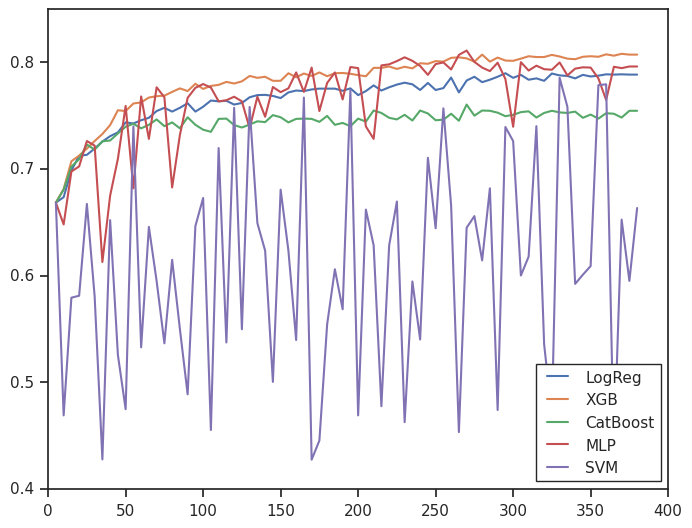

In [ ]:
# plot lines
plt.plot(x, feat_to_acc.hs_lr_acc.values, label = "LogReg")
plt.plot(x, feat_to_acc.hs_xgb_acc.values, label = "XGB")
plt.plot(x, feat_to_acc.hs_cat_acc.values, label = "CatBoost")
plt.plot(x, feat_to_acc.hs_mlp_acc.values, label = "MLP")
plt.plot(x, feat_to_acc.hs_svm_acc.values, label = "SVM")
plt.legend(loc='lower right')
plt.savefig("feat_acc_hatespeech.pdf", format="pdf", bbox_inches="tight")
plt.show()

## Abusive feature-accuracy Graph

In [ ]:
# plot lines
plt.plot(x, feat_to_acc.a_lr_acc.values, label = "LogReg")
plt.plot(x, feat_to_acc.a_xgb_acc.values, label = "XGB")
plt.plot(x, feat_to_acc.a_cat_acc.values, label = "CatBoost")
plt.plot(x, feat_to_acc.a_mlp_acc.values, label = "MLP")
plt.plot(x, feat_to_acc.a_svm_acc.values, label = "SVM")
plt.legend(loc='lower right')
plt.savefig("feat_acc_abusive.pdf", format="pdf", bbox_inches="tight")
plt.show()

## Hate Speech combined feature-accuracy Graph

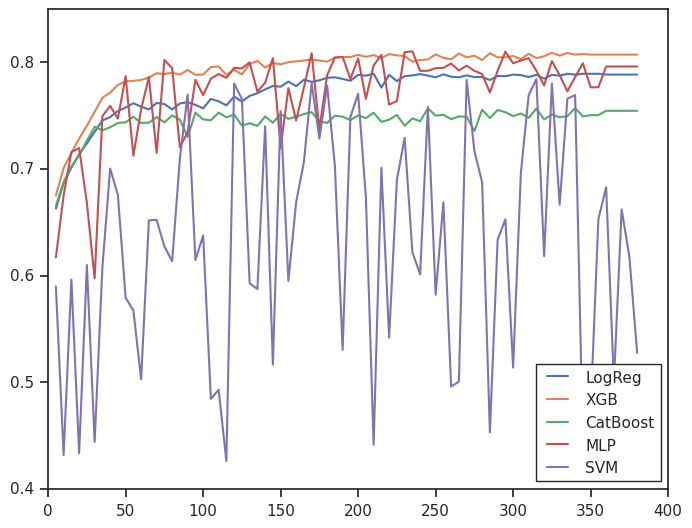

In [ ]:
# plot lines
plt.plot(x, feat_to_acc.hscom_lr_acc.values, label = "LogReg")
plt.plot(x, feat_to_acc.hscom_xgb_acc.values, label = "XGB")
plt.plot(x, feat_to_acc.hscom_cat_acc.values, label = "CatBoost")
plt.plot(x, feat_to_acc.hscom_mlp_acc.values, label = "MLP")
plt.plot(x, feat_to_acc.hscom_svm_acc.values, label = "SVM")
plt.legend(loc='lower right')
plt.savefig("feat_acc_hatespeech_combined.pdf", format="pdf", bbox_inches="tight")
plt.show()

## Abusive combined feature-accuracy Graph

In [ ]:
# plot lines
plt.plot(x, feat_to_acc.acom_lr_acc.values, label = "LogReg")
plt.plot(x, feat_to_acc.acom_xgb_acc.values, label = "XGB")
plt.plot(x, feat_to_acc.acom_cat_acc.values, label = "CatBoost")
plt.plot(x, feat_to_acc.acom_mlp_acc.values, label = "MLP")
plt.plot(x, feat_to_acc.acom_svm_acc.values, label = "SVM")
plt.legend(loc='lower right')
plt.savefig("feat_acc_abusive_combined.pdf", format="pdf", bbox_inches="tight")
plt.show()

# Sanity Check

In [12]:
hs_acc = []
a_acc = []
hscom_acc = []
acom_acc = []

In [13]:
for i in range(len(top_n_list)):
  # features
  num_feats = top_n_list[i]
  hs_n_feats = hs_top_feats[:num_feats]
  a_n_feats = a_top_feats[:num_feats]
  combined = list(set(hs_n_feats + a_n_feats))

  # data
  xtr = X_train[X_train.columns.intersection(combined)]
  xtrhs = xtr[xtr.columns.intersection(hs_n_feats)]
  xtra = xtr[xtr.columns.intersection(a_n_feats)]

  xte = X_test[X_test.columns.intersection(combined)]
  xtehs = xte[xte.columns.intersection(hs_n_feats)]
  xtea = xte[xte.columns.intersection(a_n_feats)]

  # logreg models
  HS = SVC().fit(xtrhs, Y_train_HS)
  hs_acc.append(accuracy_score(Y_test_HS, HS.predict(xtehs)))
  
  A = SVC().fit(xtra, Y_train_A)
  a_acc.append(accuracy_score(Y_test_A, A.predict(xtea)))
  
  HSc = SVC().fit(xtr, Y_train_HS)
  hscom_acc.append(accuracy_score(Y_test_HS, HSc.predict(xte)))
  
  Ac = SVC().fit(xtr, Y_train_A)
  acom_acc.append(accuracy_score(Y_test_A, Ac.predict(xte)))


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [4]:
ex_feat_to_acc = pd.read_csv('/content/drive/MyDrive/Tugas Akhir/Data/extra_feat_to_acc.csv')

In [1]:
feat_to_acc["hs_nlsvm_acc"] = hs_acc
feat_to_acc["a_nlsvm_acc"] = a_acc
feat_to_acc["hscom_nlsvm_acc"] = hscom_acc
feat_to_acc["acom_nlsvm_acc"] = acom_acc

NameError: ignored

In [16]:
from google.colab import files
feat_to_acc.to_csv('feat_to_acc.csv', encoding = 'latin-1') 
files.download('feat_to_acc.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
x = ex_feat_to_acc.n_feature.values

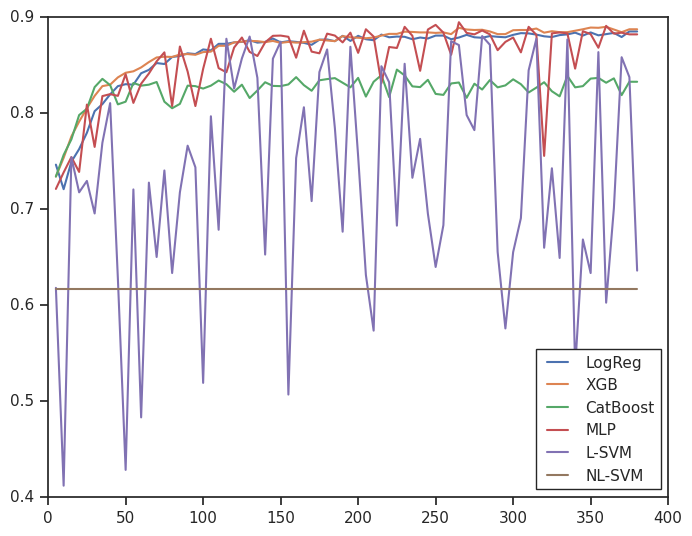

In [9]:
# plot lines
plt.plot(x, ex_feat_to_acc.a_lr_acc.values, label = "LogReg")
plt.plot(x, ex_feat_to_acc.a_xgb_acc.values, label = "XGB")
plt.plot(x, ex_feat_to_acc.a_cat_acc.values, label = "CatBoost")
plt.plot(x, ex_feat_to_acc.a_mlp_acc.values, label = "MLP")
plt.plot(x, ex_feat_to_acc.a_svm_acc.values, label = "L-SVM")
plt.plot(x, ex_feat_to_acc.a_nlsvm_acc.values, label = "NL-SVM")
plt.legend(loc='lower right')
plt.savefig("feat_acc_hatespeech.pdf", format="pdf", bbox_inches="tight")
plt.show()